# Assignment 2 - Fionn Lim

##  1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

## 2. Loading Data

In [2]:
df = pd.read_excel('mock indonesian traveller survey data.xlsx', sheet_name = '2014_2015Data')

## 3. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   Year                8887 non-null   int64         
 2   R.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   Country_residence   8887 non-null   object        
 5   City_residence      8887 non-null   object        
 6   Purpose_grp         8887 non-null   object        
 7   Purpose             8887 non-null   object        
 8   Air_Terminal        5697 non-null   object        
 9   Sea_Terminal        2828 non-null   object        
 10  Land_Terminal       355 non-null    object        
 11  langint             8887 non-null   object        
 12  1st_visit           8887 non-null   object        
 13  length_stay         8887 non-null   object      

### City Residence

In [4]:
replacement = {'City_residence' :{'Cirebon / Tjirebon' : 'Cirebon',
                                 'Jambi / Telanaipura' : 'Jambi',
                                 'Mataram / Lombok Is.' : 'Mataram',
                                 'Java Timur' : 'East Java',
                                 'Jawa Barat' : 'West Java',
                                 'Jogjakarta' : 'Yogyakarta', 
                                 'Indonesia' : 'Others',
                                 'Papua/Irian Jaya': 'Papua'}}
df.replace(replacement, inplace=True)

### Terminal

In [5]:
temp = df[df['Air_Terminal'].isna()]
temp1 = temp[temp['Sea_Terminal'].isna()]
temp2 = temp1[temp1['Land_Terminal'].isna()]

# Checking which city these tourists who have blank terminal values reside in
print('City_residence')
for i in temp2['Air_Terminal'].index:
    print(temp2.loc[i,'City_residence'])

# Checking for each required city which Terminal has the highest frequency and its name
jakarta = df[df['City_residence'] == 'Jakarta']
jakarta.filter(regex = 'Terminal$').describe()
Surabaya = df[df['City_residence'] == 'Surabaya']
Surabaya.filter(regex = 'Terminal$').describe()
Dumai = df[df['City_residence'] == 'Dumai']
Dumai.filter(regex = 'Terminal$').describe()

# From these information, its shown that for Jakarta and Surabaya, Terminal 1 under Air_Terminal has the highest frequency
# for all tourists visiting Singapore in 2014 to 2015. Hence, the entries with all blank Terminal data with residence in these
# 2 countries will be replaced with "Terminal 1". For Dumai, since there are too little entries to determine what data is the
# most appropriate to fill in with, it will just be randomly filled in with Tuas under Land_Terminal

# changing values for jakarta
change = temp2[temp2['City_residence'] == 'Jakarta']
for i in change['Air_Terminal'].index:
    df.loc[i,'Air_Terminal'] = 'Terminal 1'

# changing values for Surabaya
change = temp2[temp2['City_residence'] == 'Surabaya']
for i in change['Air_Terminal'].index:
    df.loc[i,'Air_Terminal'] = 'Terminal 1'

# changing values for Dumai
change = temp2[temp2['City_residence'] == 'Dumai']
for i in change['Air_Terminal'].index:
    df.loc[i,'Land_Terminal'] = 'Tuas'

# replacing remaining null values with 'NA'
df['Air_Terminal'].fillna('NA', inplace = True)
df['Sea_Terminal'].fillna('NA', inplace = True)
df['Land_Terminal'].fillna('NA', inplace = True)


City_residence
Jakarta
Jakarta
Jakarta
Surabaya
Dumai
Jakarta
Jakarta


### Length of Stay

In [6]:
length = {'length_stay' : {'1 day' : 1, '2 days' : 2, '3 days' : 3, '4 days' : 4, '5 days' : 5, '6 days' : 6, '7 days' : 7,
                           '8-10 days' : 9, '11-14 days' : 13, '15-29 days' : 22, '30-59 days' : 44, '60 days & over' : 60,
                           'Under 1 day' : 0}}
df.replace(length, inplace = True)

### Occupation

In [7]:
df['f3_occupation'].replace('Professiols (doctor, lawyer, lecturer, etc)', 'Professionals (doctor, lawyer, lecturer, etc)', inplace= True)
df['f3_occupation'].replace('Mager (CEO, company director, senior mager)', 'Manager (CEO, company director, senior manager)', inplace = True)
df['f3_occupation'].replace('Others (specify)', 'Others', inplace = True)

### Industry

In [8]:
df['f4_industry'].replace('Fincial and Insurance Activities', 'Financial and Insurance Activities', inplace = True)
df['f4_industry'].replace('Professiol, Scientific and Technical Activities', 'Professional, Scientific and Technical Activities'
                          ,inplace = True)

In [9]:
for i in df[df['f3_occupation']=='Student']['f3_occupation'].index:
    df.loc[i, 'f4_industry'] = "NA"
for i in df[df['f3_occupation']=='Unemployed']['f3_occupation'].index:
    df.loc[i, 'f4_industry'] = "NA"
for i in df[df['f3_occupation']=='Homemaker (Full time)']['f3_occupation'].index:
    df.loc[i, 'f4_industry'] = "NA"
for i in df[df['f3_occupation']=='Retired']['f3_occupation'].index:
    df.loc[i, 'f4_industry'] = "NA"
df['f4_industry'].fillna('NA', inplace = True)

### Designation

In [10]:
df['f5_designation'].replace('Clerk/ Secretary/ Persol Assistant', 'Clerk/ Secretary/ Personal Assistant', inplace = True)
df['f5_designation'].replace('Mager/ Assistant Mager', 'Manager/ Assistant Manager', inplace = True)
df['f5_designation'].replace('General Mager', 'General Manager', inplace = True)
df['f5_designation'].fillna('Others (specify)',inplace = True)

### Designation Others

In [11]:
df['f5_designation.oth'].fillna('Others',inplace = True)

### Main Accommodation

In [12]:
# renaming and recategorising some values for MainAccomm column
replacement = {'MainAccomm' :{'Accommodation not required - Others' : 'Not Required',
                             'Accommodation not required - Day Tripper' : 'Not Required',
                             'Accommodation not required - On-board Cruise' : 'Cruise',
                             'Other non-paid accommodations (e.g. religious places, camp,' : 'Non-Paid',
                             'Other paid accommodations (e.g.chalets, country clubs, etc)' : 'Other Paid',
                             'Stayed with relatives/ friends' : 'Relatives/friends'}}
df.replace(replacement, inplace=True)

# REPLACING NA
temp = df[df['MainAccomm'].isna().values]           # temporary database to filter out blank values in MainAccomm column
temp1 = temp[temp['length_stay'] == "Under 1 day"]  # temporary database to filter out Under 1 day value in length_stay column
for i in temp1['length_stay'].index:
    df.loc[i,'MainAccomm'] = 'Not Required'         
temp1 = temp[temp['length_stay'] == "1 day"]        # temporary database to filter out 1 day value in length_stay column
for i in temp1['length_stay'].index:
    df.loc[i,'MainAccomm'] = 'Not Required'

temp['f3_occupation']                               # checking the occupation of the remaining tourists with blank MainAccomm
temp1 = temp[temp['f3_occupation'] == "Student"]    # temporary database to filter out Students in occupation column
for i in temp1['f3_occupation'].index:
    df.loc[i, 'MainAccomm'] = 'Student Hostel'

for i in temp['MainAccomm'].index:                  # replacing the rest of the blank values to Not Required
    df.loc[i, 'MainAccomm'] = 'Not Required'
    


### Hotel Name

In [13]:
# for hotels with no hotel name
for i in df[df['MainAccomm'] != 'Hotel']['MainHotel'].index:
    df.loc[i,'MainHotel'] = 'NA'
# for main accom not hotel but have hotel names
temp = df[df['MainAccomm'] == 'Hotel']
for i in temp[temp['MainHotel'].isna()].index:
    df.loc[i,'MainHotel'] = 'Other Hotels'

### Travel Companion

In [14]:
df['travel_companion.2'].fillna('NA',inplace = True)
df['travel_companion.3'].fillna('NA',inplace = True)
df['travel_companion.4'].fillna('NA',inplace = True)
df['travel_companion.5'].fillna('NA',inplace = True)

### Exploratory Questions
 1.  How do spendings differ for tourists from each city region?
 2.  For Java and Sumatra, what are the spendings like for each city?
 3.  What is the relationship between travel types and spendings?
 4.  Are there any relationship between visit purpose and spendings?
 5.  Breakdown of total spendings within selected cities based on previous discoveries.
 6.  Who is the target audience of the tour agency's packages
 7.  Is there a period or month to push more advertisements and promotions to attract more tourists?

### Creating Columns

In [15]:
# Total Spendings
df['total_spendings'] = df['totacc_$'] + df['totfnb_$'] + df['tottran_$'] + df['totbiz_$'] +df['totedu_$'] + df['totmedi_$'] + df['tototh_$'] + df['totshopping_$']

# Regions of Indonesia (9 main regions)
df['Regions'] = df['City_residence']
replacement = {'Regions' : {"Aceh" : "Sumatra", "Batam" : "Sumatra", "Bengkulu" : "Sumatra", "Bintan" : "Sumatra", 
                            "Dumai": "Sumatra", "Jambi": "Sumatra", "Karimun": "Sumatra", "Lampung": "Sumatra", 
                            "Lingga Is.": "Sumatra", "Medan": "Sumatra", "Padang": "Sumatra", "Riau" : "Sumatra", 
                            "Sumatra": "Sumatra", "Tanjung Balai": "Sumatra", "Tanjung Pinang" : "Sumatra", 
                            "Palembang" : "Sumatra",  "Pangkal Pinang" : "Sumatra", "Pekan Baru" : "Sumatra", 
                            "Selat Panjang" : "Sumatra", "Bali" : "Java", "Bandung" : "Java", "Banten" : "Java", 
                            "Bekasi" : "Java", "Bogor" : "Java", "Cirebon" : "Java", "Denpasar" : "Java", 
                            "Jakarta" : "Java", "East Java" : "Java", "Java" : "Java", "West Java" : "Java", 
                            "Yogyakarta" : "Java", "Magelang" : "Java", "Malang" : "Java", "Semarang" : "Java", 
                            "Sukabumi" : "Java", "Solo" : "Java", "Surabaya" : "Java", "Surakarta" : "Java", 
                            "Tangerang" : "Java", "Balikpapan" : "Kalimantan", "Banjarmasin" : "Kalimantan", 
                            "Kalimantan" : "Kalimantan", "PalangKaraya" : "Kalimantan", "Pontianak" : "Kalimantan", 
                            "Samarinda" : "Kalimantan", "Kupang" : "Nusa Tenggara", "Lombok" : "Nusa Tenggara", 
                            "Mataram" : "Nusa Tenggara", "Sumbawa Is." : "Nusa Tenggara", "Makassar" : "Sulawesi", 
                            "Manado" : "Sulawesi", "Sulawesi" : "Sulawesi", "Maluku" : "Maluku", "Papua" : "Papua", 
                            "Temburong" : "Brunei", "Others" : "Others"}}

df.replace(replacement, inplace =True)


# Month number
df['month_number'] = df['R.mth']
replace = {'month_number' : {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' :5, 'June' : 6,
                             'July' : 7, 'August':8, 'September':9,'October':10,'November':11,"December":12}}
df.replace(replace, inplace = True)

# Estimated Number of tourists as a group
companion = df.filter(regex = '^travel_companion', axis = 1)
count = 0
row = 0
df['grp_num'] = df['travel_companion.1']
while row < companion.shape[0]:
    if df.loc[row,'travel_companion.1'] != 'NA':
        if df.loc[row,'travel_companion.1'] == 'Alone':
            count+=1
        else:
            count+=2
    if df.loc[row,'travel_companion.2'] != 'NA':
        count+=1
    if df.loc[row,'travel_companion.3'] != 'NA':
        count+=1
    if df.loc[row,'travel_companion.4'] != 'NA':
        count+=1
    if df.loc[row,'travel_companion.5'] != 'NA':
        count+=1
    df.loc[row,'grp_num'] = count
    count = 0
    row +=1
# Working status
df['Working_status'] = df['f4_industry']
df['Working_status'].replace('NA', 'Non-Working', inplace = True)
for x in df['Working_status']:
    if x != 'Non-Working':
        df['Working_status'].replace(x, 'Working', inplace = True)

# Transport mode
df['Transport'] = df['Air_Terminal']
for x in df['Transport']:
    if x != 'NA':
        df['Transport'].replace(x,'Air',inplace = True)
for x in df['Transport'].index:
    if df.loc[x,'Sea_Terminal'] != 'NA':
        df.loc[x,'Transport'] = 'Sea'
    elif df.loc[x,'Land_Terminal'] != 'NA':
        df.loc[x,'Transport'] = 'Land'

### Assumptions

#### 1. Cities with the same name as the Region are undefined

        For example:
                    City : Sumatra
                    Region : Sumatra
                    - Assume the city is not specified but part of Sumatra

#### 2. Temburong (City) is part of Indonesia
        Through research, it was found that Temburong is a city in Brunei, which is not part of Indonesia
        However, since there is only 1 entry of this city, it will just be assumed that Brunei is part of
        Indonesia.

#### 3. There are many different packages for different regions and cities

### Exploration

#### 1. Extreme outlier in dataset where total spendings > $25 million

In [16]:
print("Original Data - Total Spendings")
print(df['total_spendings'].describe())
df1 = df.drop(df[df['total_spendings'] > 25000000].index)
print()
print("New Data - Total Spendings")
print(df1['total_spendings'].describe())

Original Data - Total Spendings
count    8.887000e+03
mean     3.685110e+03
std      2.736304e+05
min      8.086393e+01
25%      2.070473e+02
50%      4.279709e+02
75%      8.552404e+02
max      2.579524e+07
Name: total_spendings, dtype: float64

New Data - Total Spendings
count      8886.000000
mean        782.617041
std        2317.526501
min          80.863932
25%         207.025226
50%         427.904472
75%         854.901965
max      100596.373698
Name: total_spendings, dtype: float64


Creating a new dataframe and dropping this entry will help to retain the original if needed for reference later. The new dataframe df1 will exclude the extreme outlier, making data analysis more accurate since this outlier will affect the total and mean spendings of the involved city and region. Hence, all analyses and exploration will use the df1 dataframe.

<Figure size 1000x800 with 0 Axes>

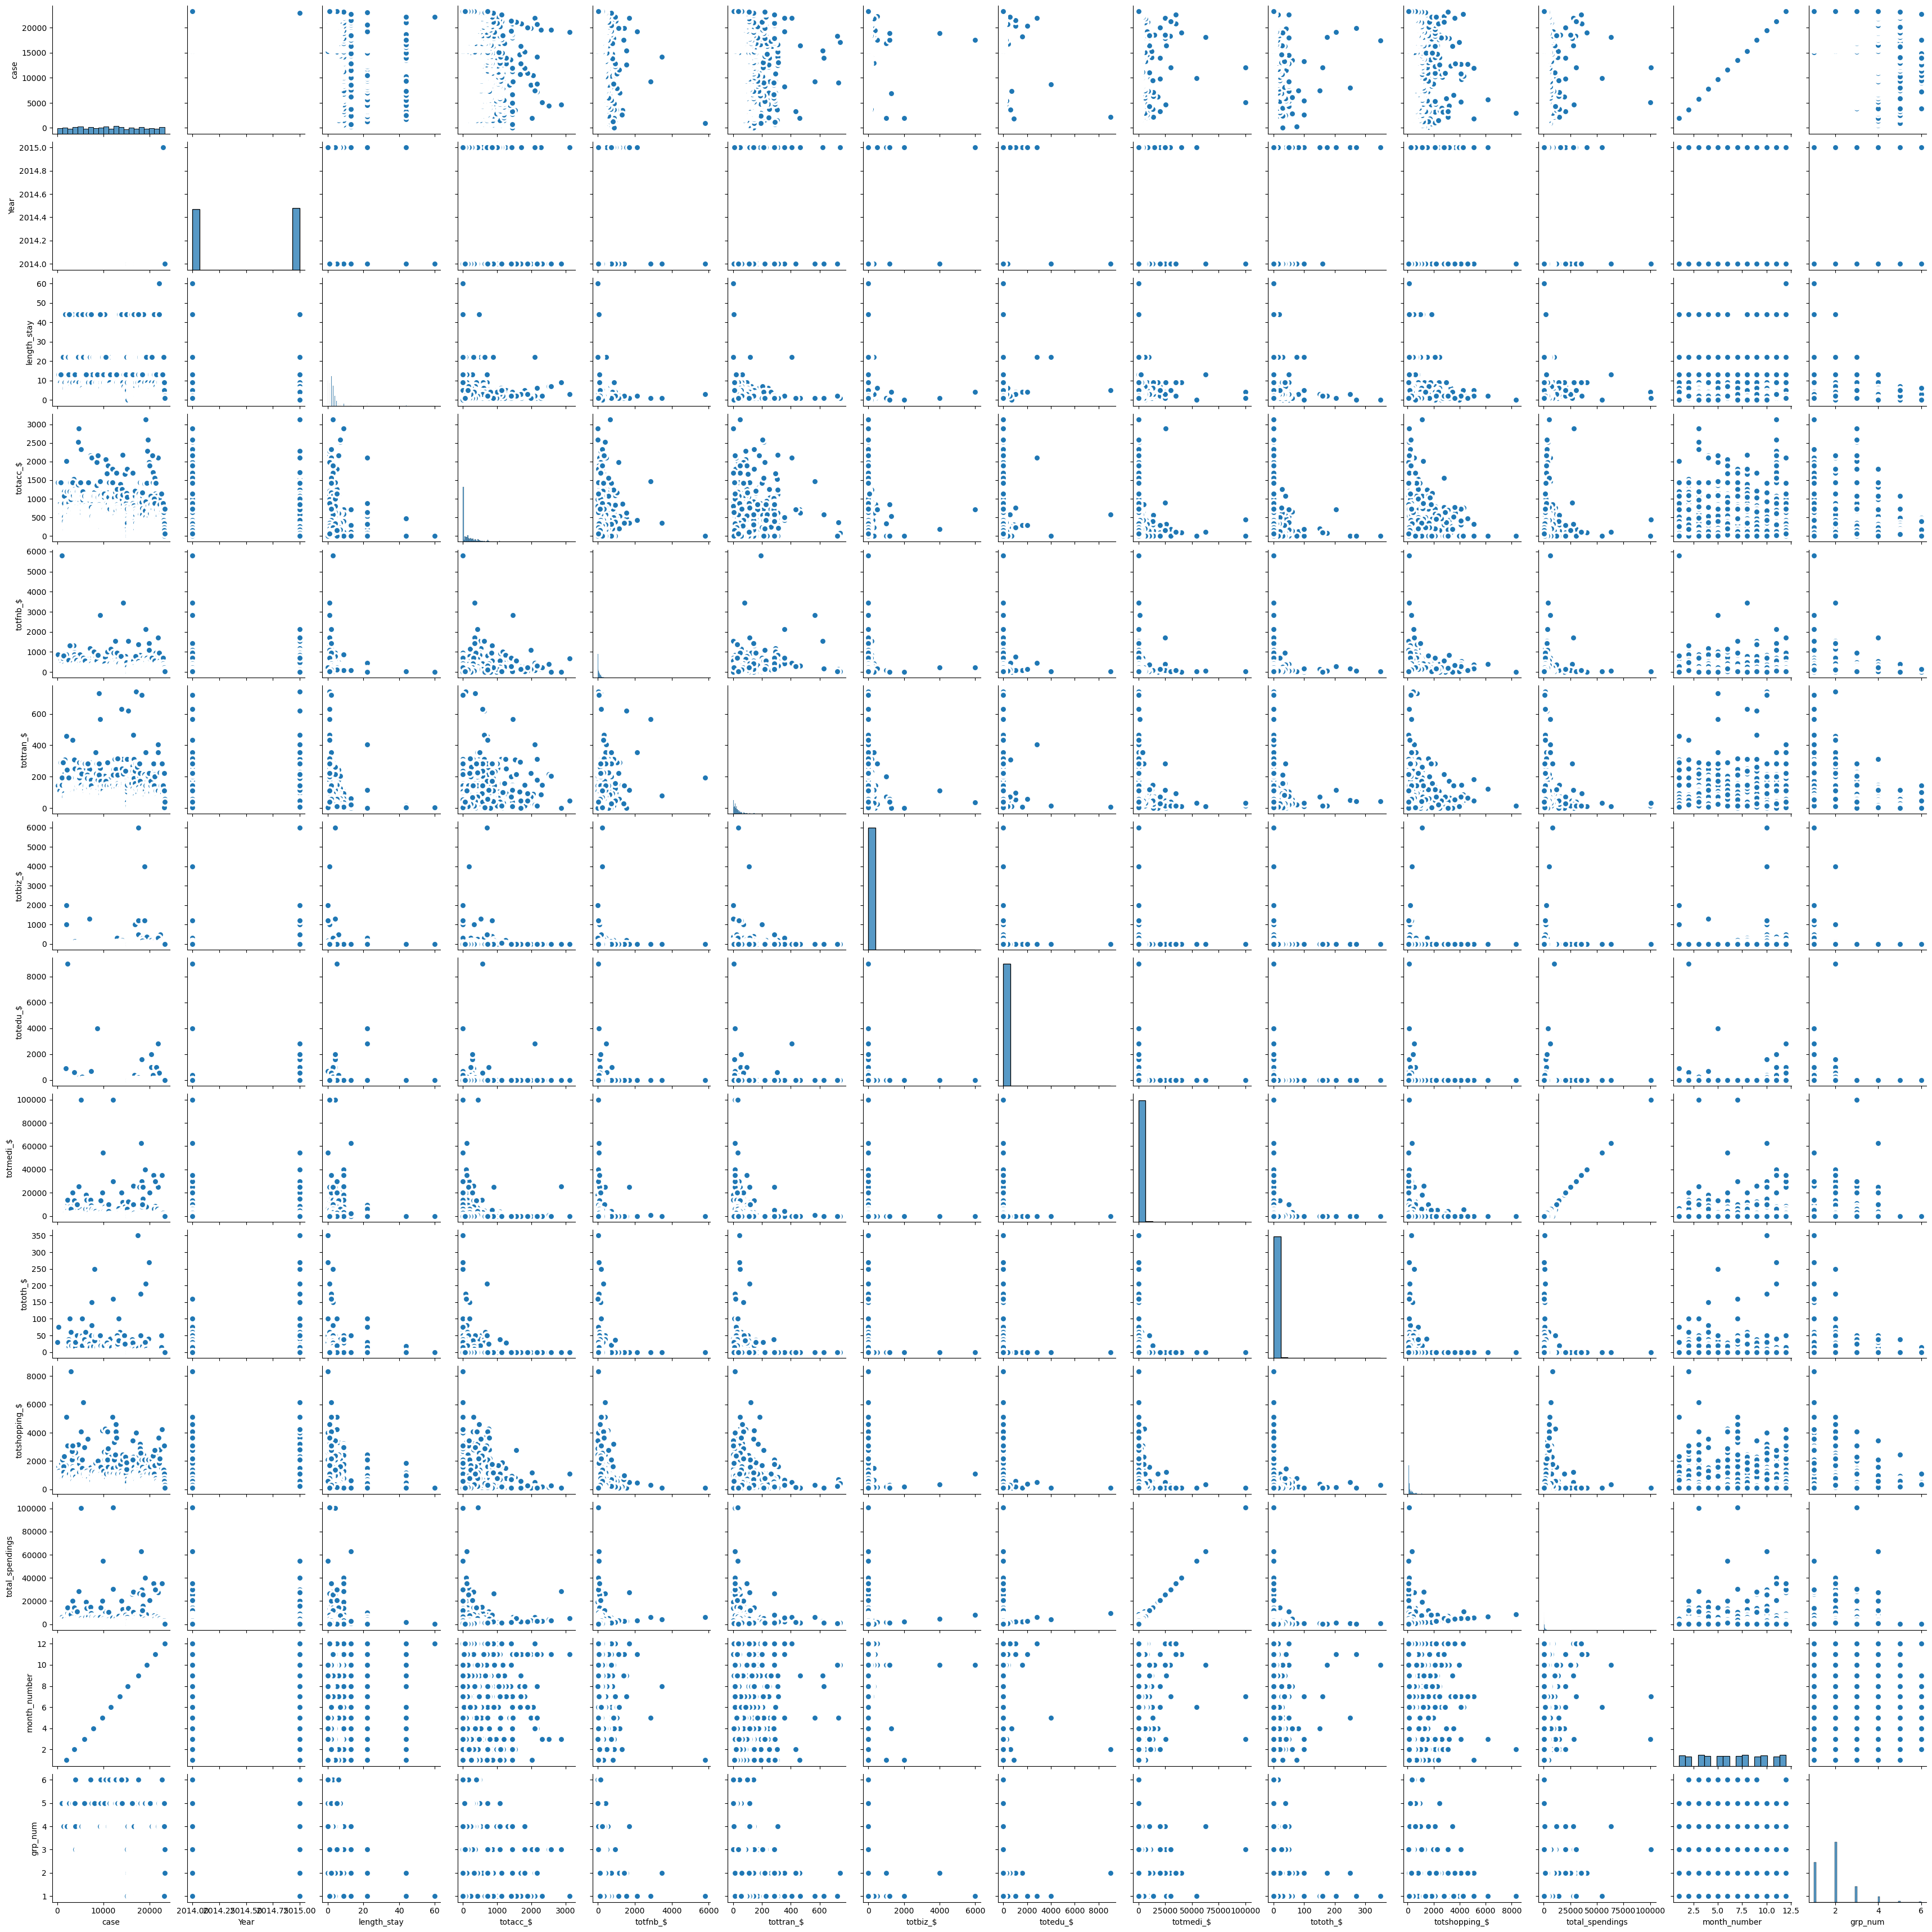

In [17]:
plt.figure(figsize=(10,8), dpi= 100)
sns.pairplot(df1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#### 2. Large difference in number of tourists visiting Singapore from the different regions

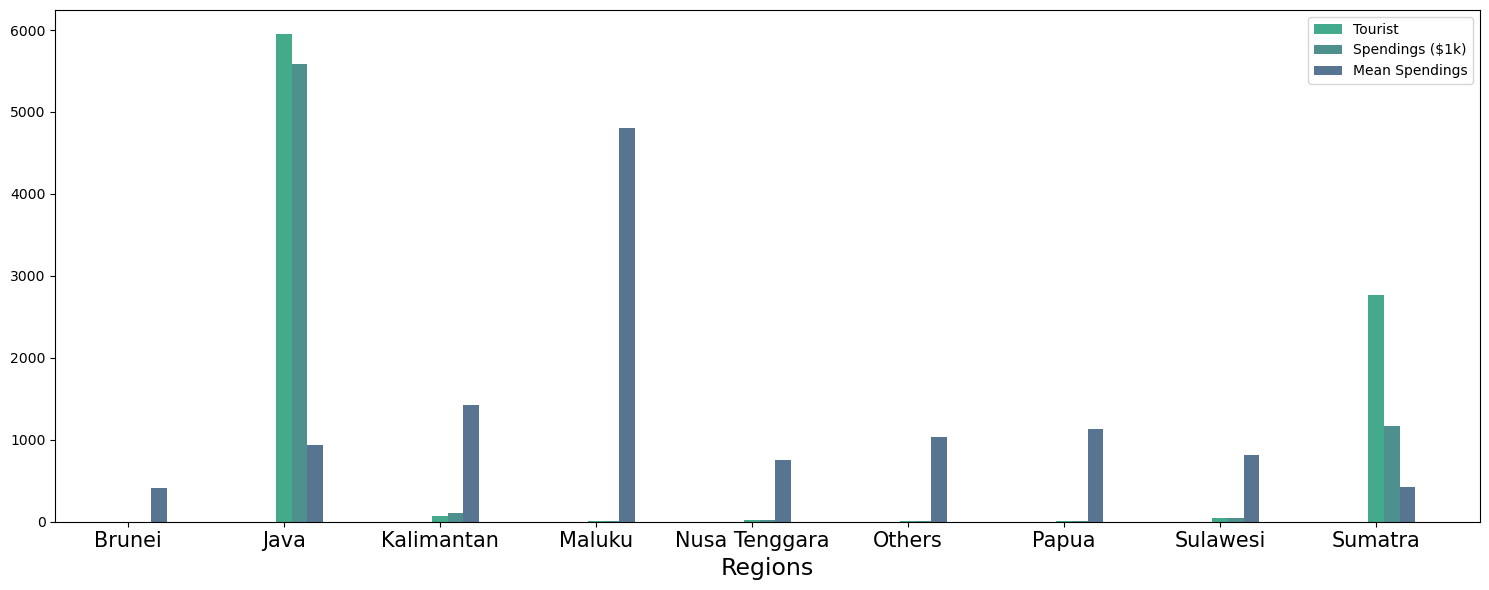

In [19]:
region = np.unique(df1['Regions'].values)
x = np.arange(len(region))
width = 0.10
tourist = df1.groupby('Regions')['case'].count()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))
spend = df1.groupby('Regions')['total_spendings'].sum()
spend /= 1000
bar1 = axes.bar(x, tourist, width, color = '#43aa8b', label='Tourist')
bar2 = axes.bar(x+width, spend, width, color = '#4d908e', label='Spendings ($1k)')
mean = df1.groupby('Regions')['total_spendings'].mean()
bar3 = axes.bar(x+width+width, mean, width, color = '#577590', label = 'Mean Spendings')
axes.set_xlabel('Regions', fontsize = 17)
axes.set_xticks(x)
axes.set_xticklabels(region, fontsize = 15)
axes.legend()
fig.tight_layout()
plt.show()

From this bar chart, it can be seen that Java has the most number of tourists visiting Singapore, followed by Sumatra then Kalimantan. Likewise, the sum of total spendings in each region follows the same order, however mean spendings do not follow this order as there is a big difference for the number of tourists from each region. Hence, mean total spendings will not be used in this report.

### Question 1: How do total spendings differ for tourists from each city region

#### All regions

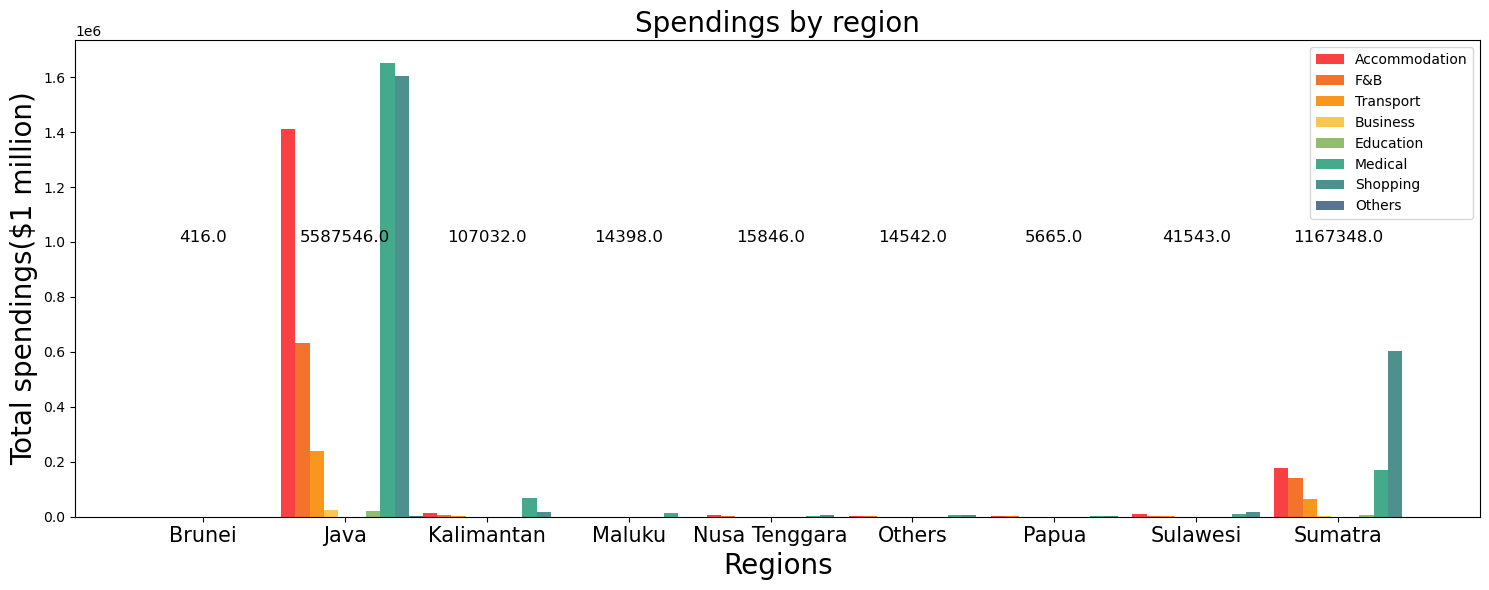

In [197]:
region = np.unique(df1['Regions'].values)

x = np.arange(len(region))
width = 0.10
acc = []
fnb = []
tran = []
biz = []
edu = []
medi = []
oth = []
shop = []
for r in region:
    temp = df1[df1['Regions'] == r]
    acc.append(temp['totacc_$'].sum())
    fnb.append(temp['totfnb_$'].sum())
    tran.append(temp['tottran_$'].sum())
    biz.append(temp['totbiz_$'].sum())
    edu.append(temp['totedu_$'].sum())
    medi.append(temp['totmedi_$'].sum())
    oth.append(temp['tototh_$'].sum())
    shop.append(temp['totshopping_$'].sum())

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))

bar1 = axes.bar(x-width*4, acc, width, color = '#f94144', label='Accommodation')
bar2 = axes.bar(x-width*3, fnb, width, color = '#f3722c', label='F&B')
bar3 = axes.bar(x-width*2, tran, width, color = '#f8961e', label = 'Transport')
bar4 = axes.bar(x-width, biz, width, color = '#f9c74f', label = 'Business')
bar5 = axes.bar(x+width*2, edu, width, color = '#90be6d', label = 'Education')
bar6 = axes.bar(x+width*3, medi, width, color = '#43aa8b', label = 'Medical')
bar7 = axes.bar(x+width*4, shop, width, color = '#4d908e', label = 'Shopping')
bar8 = axes.bar(x+width*5, oth, width, color = '#577590', label = 'Others')

axes.set_title('Spendings by region', fontsize = 20)
axes.set_xlabel('Regions', fontsize = 20)
axes.set_ylabel('Total spendings($1 million)', fontsize = 20)
axes.set_xticks(x)
axes.set_xticklabels(region, fontsize = 15)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,1000000,y[i], ha= 'center', fontsize = 12)
total = df1.groupby('Regions')['total_spendings'].sum().round()
addlabels(region, total)
axes.legend()
fig.tight_layout()
plt.show()

This chart shows the different spendings types for each region in Indonesia. From this chart, spendings from Java has the most contribution of around 5.5 million to the overall total recorded from 2014 to 2015, followed by Sumatra with 1.2 million. For Java, spendings on Medical, Shopping and Accommodation makes up most of the total spendings in Java in sequence. However the difference between spendings in Java,Sumatra and the other regions are too big, it is difficult to see the breakdown in spendings for them. Hence, they will be plotted in the next part.

#### Without Java and Sumatra

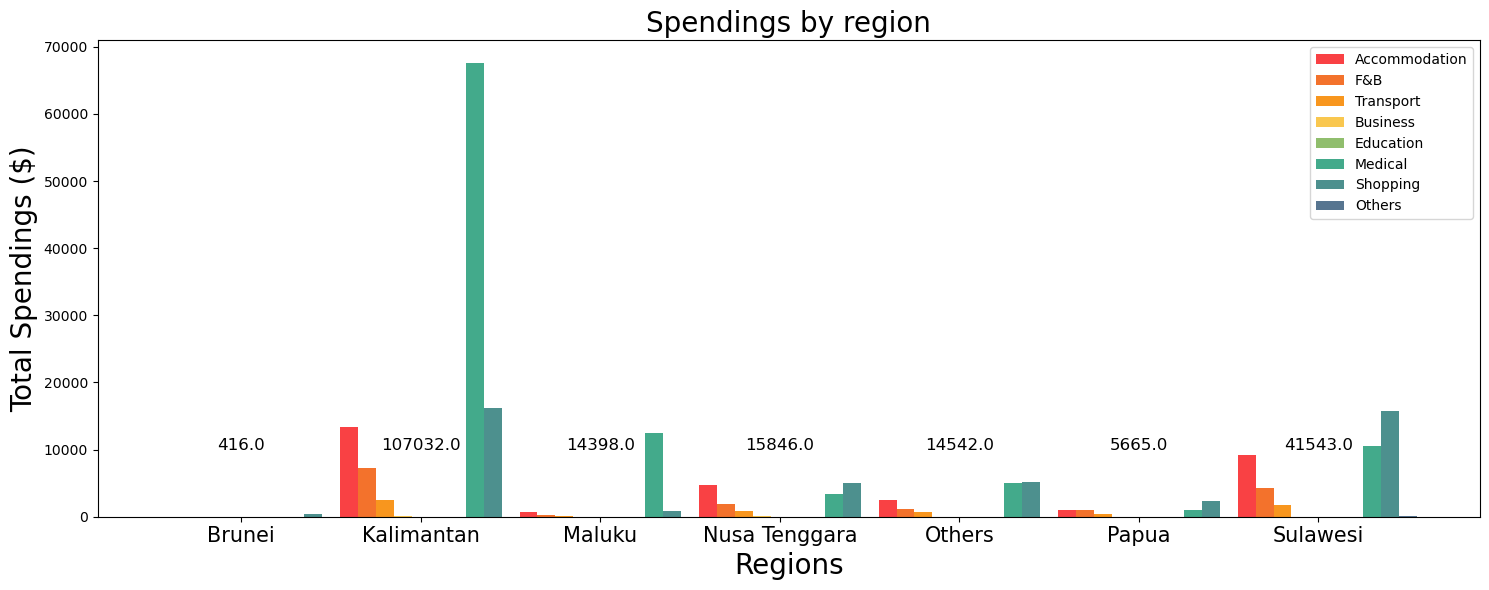

In [182]:
df2 = df1.drop(df1[df1['Regions'] == 'Java'].index)
df2 = df2.drop(df2[df2['Regions'] == 'Sumatra'].index)
region = np.unique(df2['Regions'].values)
x = np.arange(len(region))
width = 0.10
acc = []
fnb = []
tran = []
biz = []
edu = []
medi = []
oth = []
shop = []
for r in region:
    temp = df2[df2['Regions'] == r]
    acc.append(temp['totacc_$'].sum())
    fnb.append(temp['totfnb_$'].sum())
    tran.append(temp['tottran_$'].sum())
    biz.append(temp['totbiz_$'].sum())
    edu.append(temp['totedu_$'].sum())
    medi.append(temp['totmedi_$'].sum())
    oth.append(temp['tototh_$'].sum())
    shop.append(temp['totshopping_$'].sum())

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))

bar1 = axes.bar(x-width*4, acc, width, color = '#f94144', label='Accommodation')
bar2 = axes.bar(x-width*3, fnb, width, color = '#f3722c', label='F&B')
bar3 = axes.bar(x-width*2, tran, width, color = '#f8961e', label = 'Transport')
bar4 = axes.bar(x-width, biz, width, color = '#f9c74f', label = 'Business')
bar5 = axes.bar(x+width*2, edu, width, color = '#90be6d', label = 'Education')
bar6 = axes.bar(x+width*3, medi, width, color = '#43aa8b', label = 'Medical')
bar7 = axes.bar(x+width*4, shop, width, color = '#4d908e', label = 'Shopping')
bar8 = axes.bar(x+width*5, oth, width, color = '#577590', label = 'Others')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,10000,y[i], ha= 'center', fontsize = 12)
total = df2.groupby('Regions')['total_spendings'].sum().round()
addlabels(region, total)
axes.set_title('Spendings by region', fontsize = 20)
axes.set_xlabel('Regions', fontsize = 20)
axes.set_ylabel('Total Spendings ($)', fontsize = 20)
axes.set_xticks(x)
axes.set_xticklabels(region, fontsize = 15)
axes.legend()
fig.tight_layout()
plt.show()

This chart is the same as the previous, but with Java and Sumatra removed from the graph to have a better visual. Among these remaining regions, Kalimantan leads in terms of total spendings with around 100 thousand. And it is mainly contributed by Medical expenditures in Kalimantan. Overall, from these 2 graphs, Medical and Shopping expenditures have the highest contributions to the total spendings. However, as mentioned, the gap between Java and other regions is too wide, for the purpose of this report, it will continue to analyse spendings and characteristics of tourists from Java and Sumatra only.

### Question 2: For Java and Sumatra, what are the spendings like for each city?

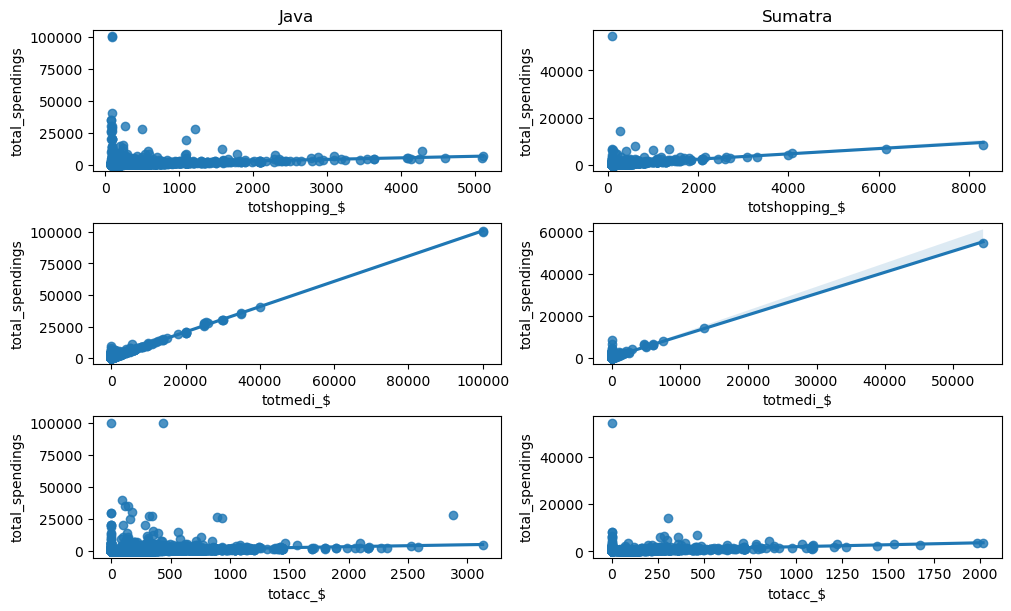

In [29]:
fig, ax = plt.subplots(3,2, figsize=(10,6), constrained_layout=True)
x1 = df1[df1['Regions'] == 'Java']
ax1 = sns.regplot(x =  x1['totshopping_$'], y = x1['total_spendings'] , ax=ax[0,0])
ax4 = sns.regplot(x = x1['totmedi_$'], y =x1['total_spendings'], ax =ax[1,0])
ax7 = sns.regplot(x = x1['totacc_$'], y =x1['total_spendings'], ax =ax[2,0])
ax1.set_title('Java')

x2 = df1[df1['Regions'] == 'Sumatra']
ax2 = sns.regplot(x =  x2['totshopping_$'], y = x2['total_spendings'] , ax=ax[0,1])
ax5 = sns.regplot(x =  x2['totmedi_$'], y = x2['total_spendings'] , ax=ax[1,1])
ax8 = sns.regplot(x = x2['totacc_$'], y =x2['total_spendings'], ax =ax[2,1])
ax2.set_title('Sumatra')

plt.show()

Based on the previous question, it has been concluded that Shopping, Medical and Accommodation expenditures make up most of the total spendings. Hence, this visual aims to see how each expenditure afect the total spendings in Java and Sumatra. For both regions, it is very obvious that medical expenditures affect the total spendings more than the other 2. One thing to note is that shopping expenditures in Sumatra affects the total spendings more than shopping expenditures in Java 

#### Java 

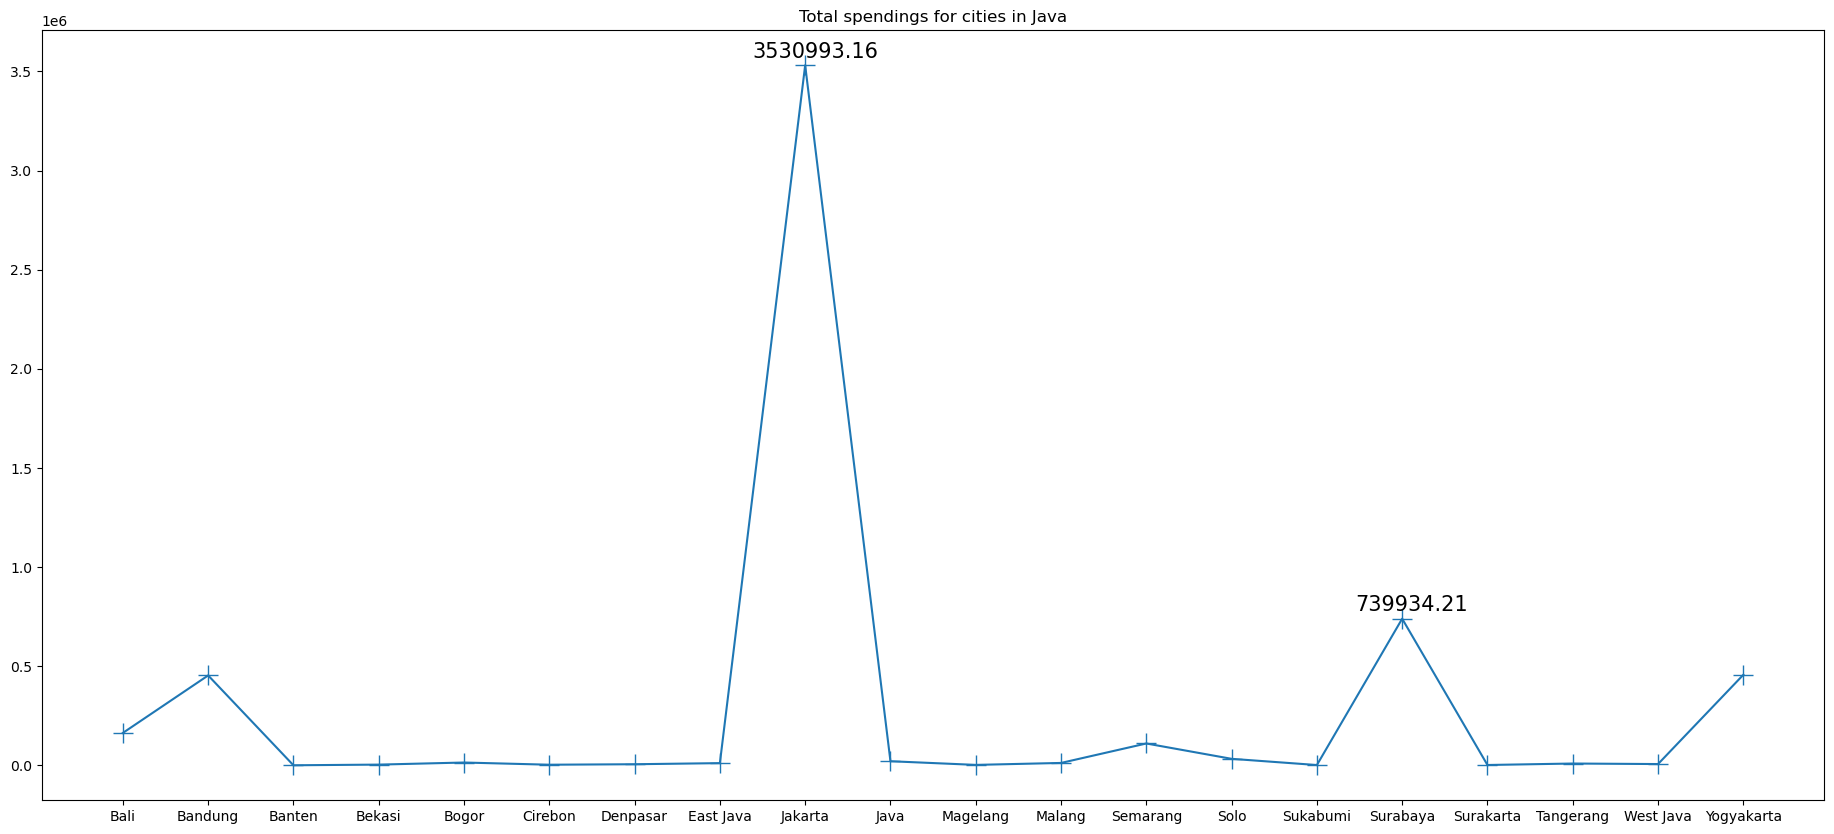

In [25]:
plt.figure(figsize=(23,10))
region = df[df['Regions'] == 'Java']
city = np.unique(region['City_residence'].values)
spend = region.groupby('City_residence')['total_spendings'].sum()
spendings = []
plt.title("Total spendings for cities in Java")
total = 0
for s in spend:
    spendings.append(s)
    total += s
for x, y in zip(city,spendings):
    if y > (0.1 * total):
        label = "{:.2f}".format(y) 
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points", 
                     xytext=(7,5.5), 
                     ha='center',
                     fontsize = 15)
plt.plot(city, spendings, '-+', markersize = 15)
plt.show()

This line chart aims to show the different total spendings within Java, by its cities. This chart was set to annotate only the total spendings with 10% and above of the entire total spendings in Java. Hence from this chart, it is clear that Jakarta makes up most of the total spendings with around 3.5 million, followed by Surabaya with 700 thousand total spendings. The other cities have very minor contributions to the total spendings for Java.

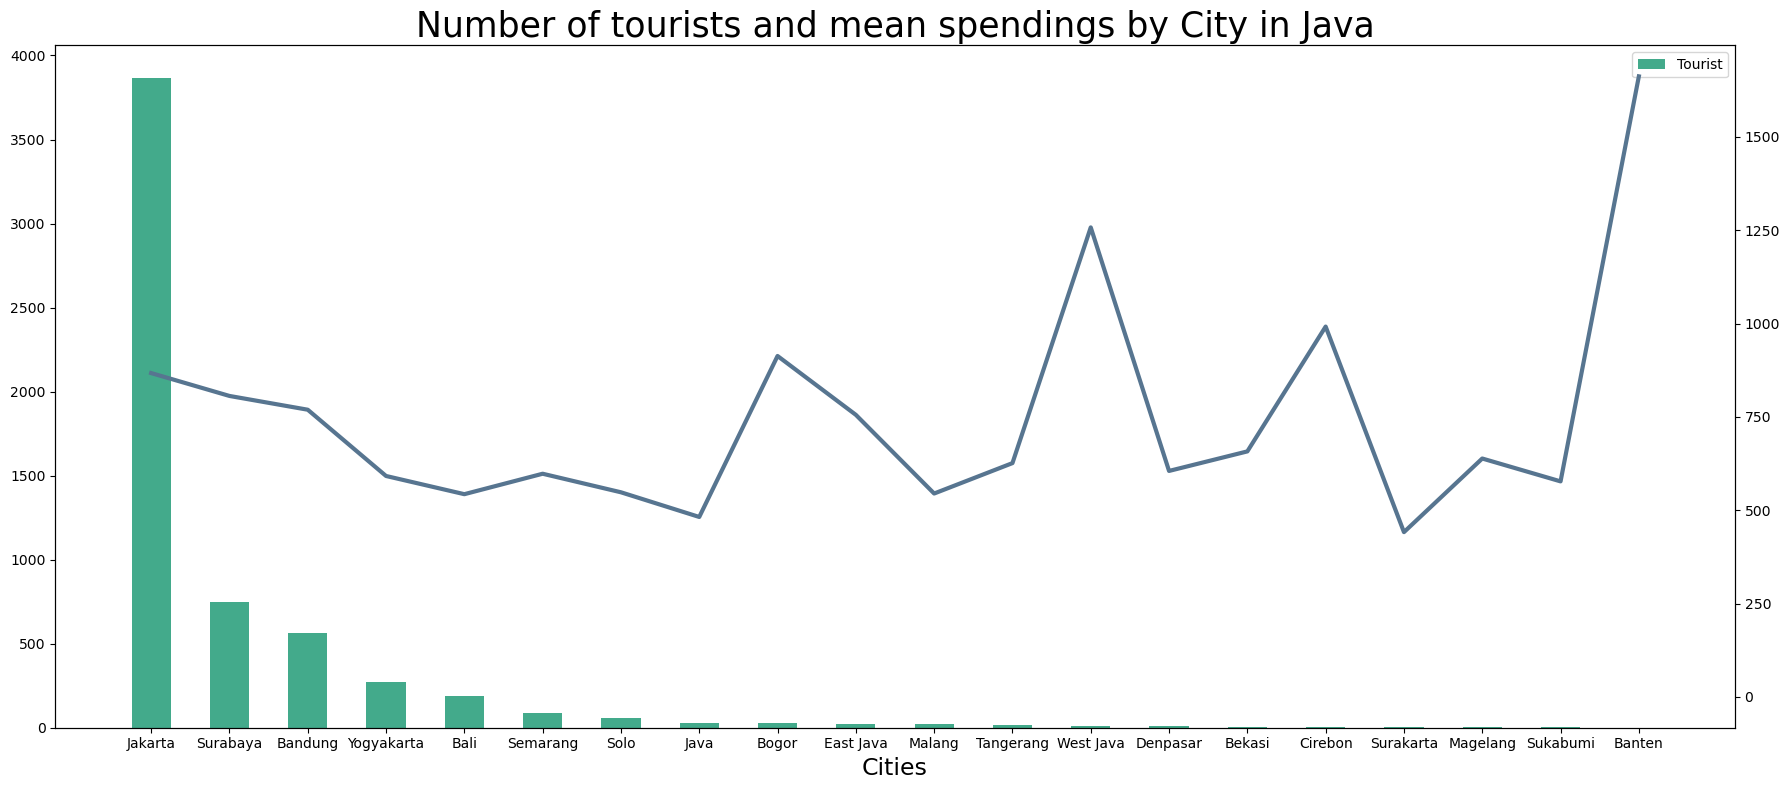

In [201]:
region = df1[df1['Regions'] == 'Java']
tourist = region.groupby('City_residence')['case'].count()
tourist.sort_values(ascending = False, inplace = True)
city = tourist.index
x = np.arange(len(city))
width = 0.50
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (18,8))
spend = region.groupby('City_residence')['total_spendings'].sum()
ax1.bar(x, tourist, width, color = '#43aa8b', label='Tourist')
ax1.set_title("Number of tourists and mean spendings by City in Java", fontsize = 25)
ax1.set_xlabel('Cities', fontsize = 17)
axes.set_xticks(x)
axes.set_xticklabels(city, fontsize = 15)
ax2 = ax1.twinx()
mean = region.groupby('City_residence')['total_spendings'].mean()
ax2.plot(city, mean, width, color = '#577590', linewidth = 3)
ax1.legend()
fig.tight_layout()
plt.show()


This chart shows the total number of tourists from each city of Java who visited Singapore betweeen 2014 and 2015 as bar graphs. The y axis on the left refers to the number of tourists. In addition, this chart also shows the mean spendings of tourists from each city as a line graoh, with the y-axis on the right to support this. This chart aimed to see the relationship between mean spendings and number of tourists. It is evident that there is a negative relationship between these 2 factors, as the number of tourists decrease, the mean spendings increase. However, this means that mean spendings will not be completely reliable to look at when comparing between factors with different number of tourists like city and region. Hence this report will rarely touch on mean spendings. Instead, from this point onwards, the report will use Jakarta, Surabaya and Bandung for Java cities as they have a decent amount of tourists, mean spending, and total spendings.

#### Sumatra

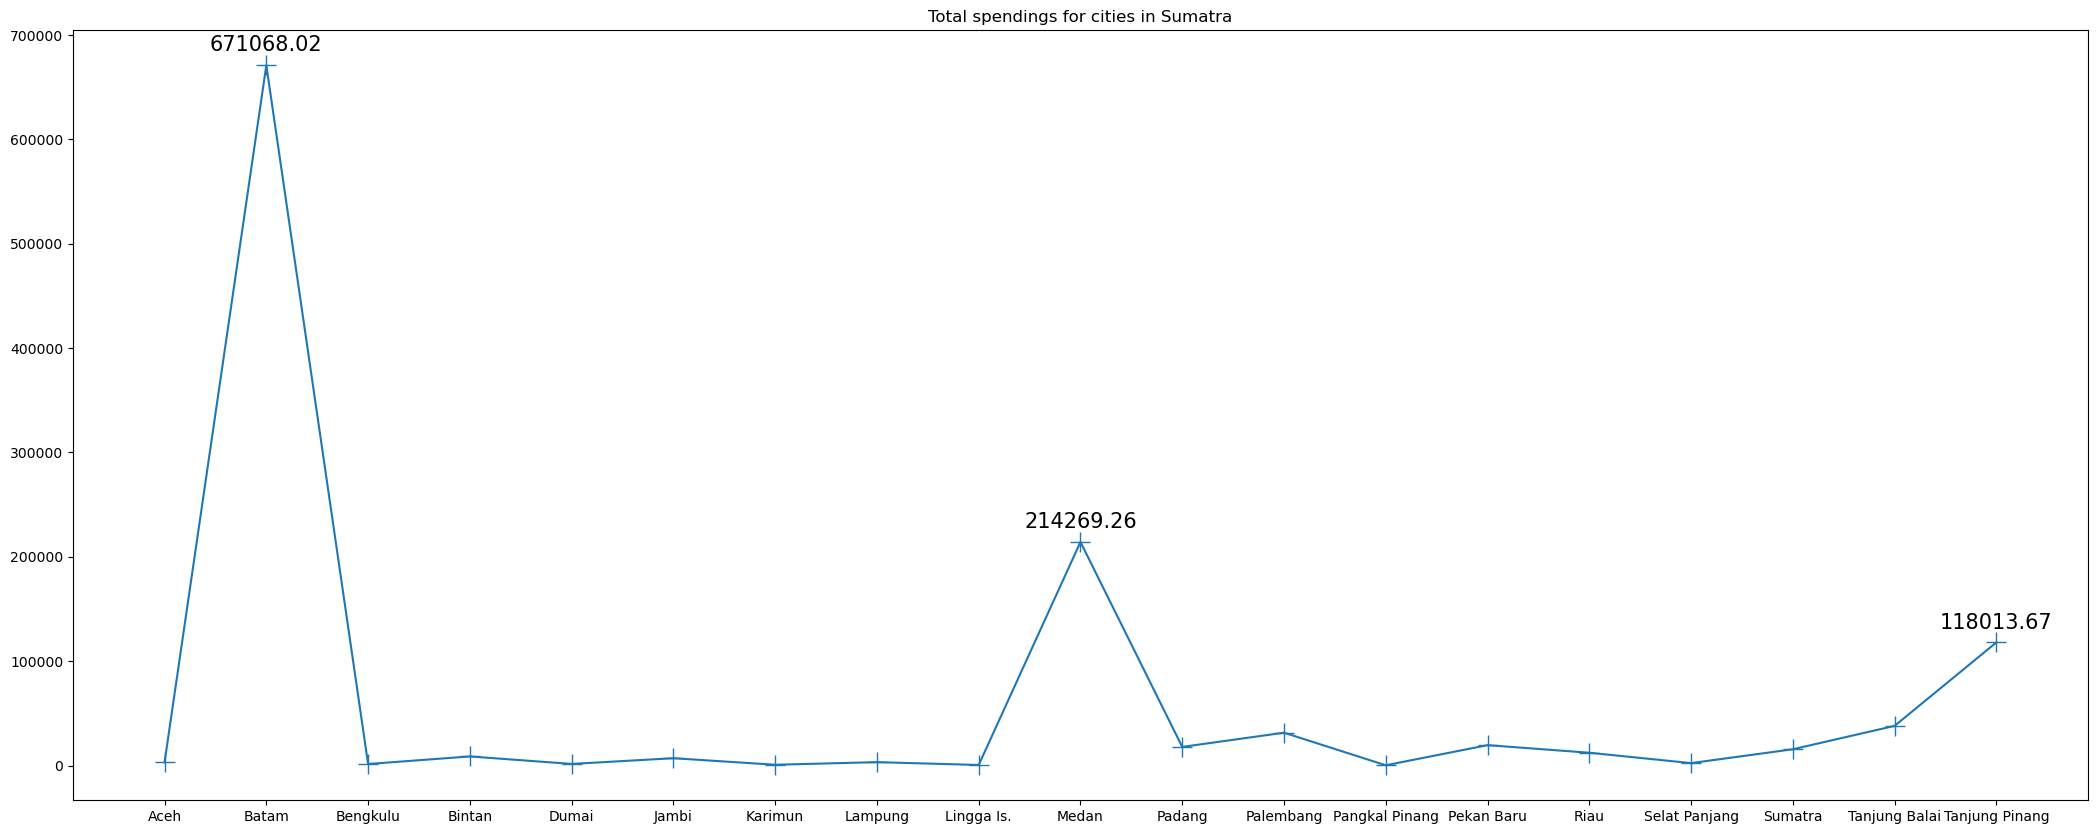

In [27]:
plt.figure(figsize=(26,10))
sumatra = df1[df1['Regions'] == 'Sumatra']
city = np.unique(sumatra['City_residence'].values)
spend = sumatra.groupby('City_residence')['total_spendings'].sum()
spendings = []
plt.title("Total spendings for cities in Sumatra")
total = 0
for s in spend:
    spendings.append(s)
    total += s
for x, y in zip(city,spendings):
    if y > (0.1 * total):
        label = "{:.2f}".format(y) 
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize = 15)
plt.plot(city, spendings, '-+', markersize = 15)
plt.show()

This line chart aims to show the different total spendings within Sumatra cities. This chart was set to annotate only the total spendings with 10% and above of the entire total spendings in Java. Hence from this chart, it is clear that Batam makes up most of the total spendings with around 670 thousand, followed by Surabaya with around 210 thousand, and Tanjung Pinang with around 110 thousand total spendings.

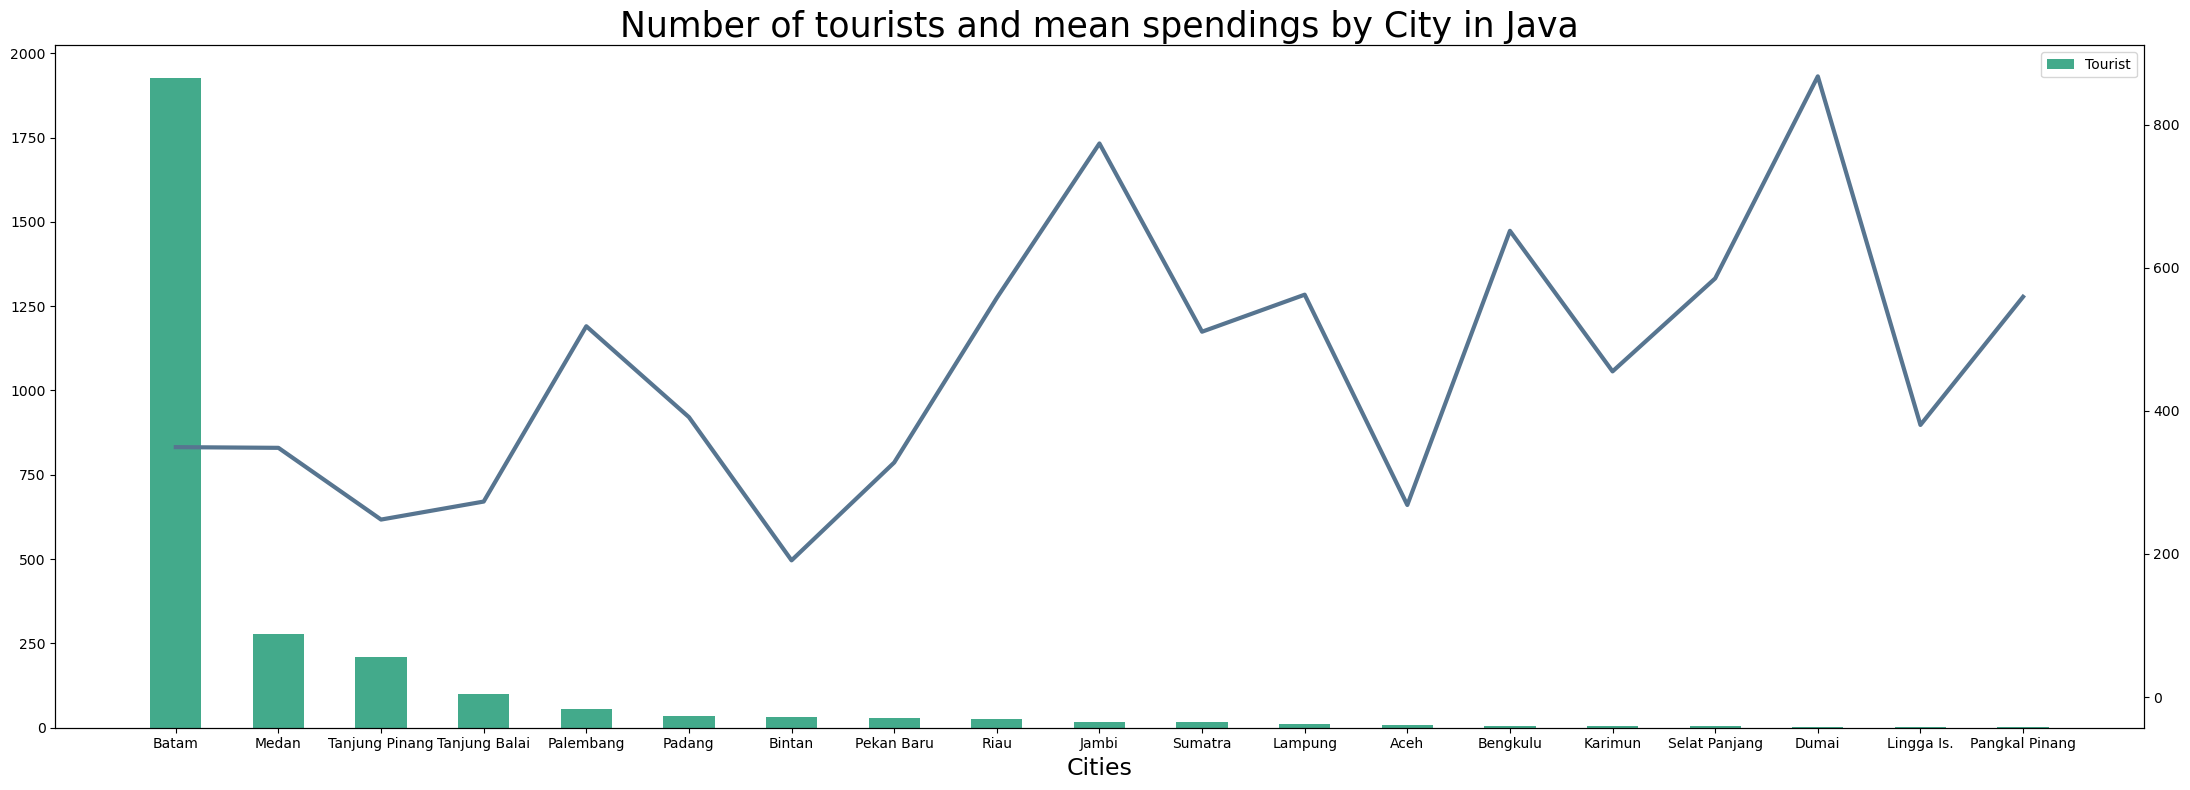

In [202]:
region = df1[df1['Regions'] == 'Sumatra']
tourist = region.groupby('City_residence')['case'].count()
tourist.sort_values(ascending = False, inplace = True)
city = tourist.index
x = np.arange(len(city))
width = 0.50
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (22,8))
spend = region.groupby('City_residence')['total_spendings'].sum()
ax1.bar(x, tourist, width, color = '#43aa8b', label='Tourist')
ax1.set_title("Number of tourists and mean spendings by City in Java", fontsize = 25)
ax1.set_xlabel('Cities', fontsize = 17)
axes.set_xticks(x)
axes.set_xticklabels(city, fontsize = 15)
ax2 = ax1.twinx()
mean = region.groupby('City_residence')['total_spendings'].mean()
ax2.plot(city, mean, width, color = '#577590', label = 'Mean Spendings', linewidth = 3)
ax1.legend()
fig.tight_layout()
plt.show()

This chart shows the total number of tourists from each city of Sumatra who visited Singapore betweeen 2014 and 2015 as bar graphs. The y axis on the left refers to the number of tourists. In addition, this chart also shows the mean spendings of tourists from each city as a line graoh, with the y-axis on the right to support this. It is evident that there is a negative relationship between these 2 factors, as the number of tourists decrease, the mean spendings increase. Compared to the pervious analysis on Java, the negative relationship here is not as strong. Despite that, the mean spendings will also not use mean spendings. For Sumatra, the report will use Batam, Medan and Tanjung Pinang.

### 3. What is the relationship between travel types and spendings?

#### Java

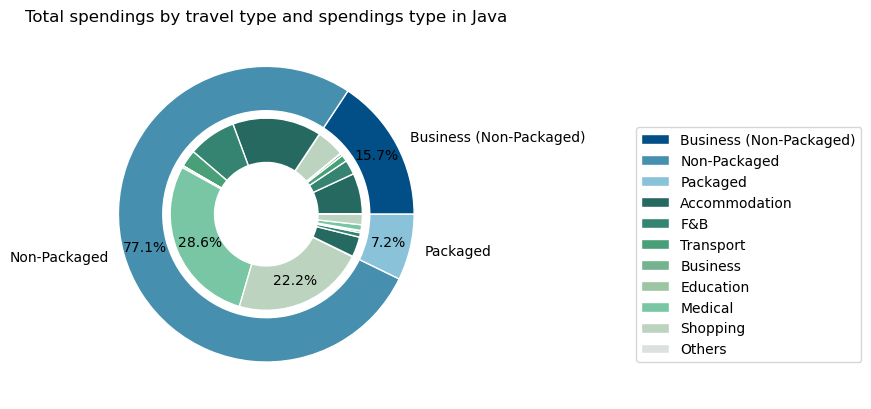

In [222]:
fig, ax = plt.subplots()
size = 0.3
region = df1[df1['Regions'] == "Java"]
def myautopct(pct):
    return ('%.1f%%' % pct) if pct > 20 else ''
#outer 
outer = region.groupby('travel_type')['total_spendings'].sum()
outer_label = outer.index
ax.pie(outer.values.flatten(), radius=1, autopct='%1.1f%%', pctdistance = 0.85, colors=['#014f86','#468faf','#89c2d9'],
       wedgeprops=dict(width=size, edgecolor='w'), labels = outer_label)

#inner
spendings = []
for t in outer.index:
    temp = region[region['travel_type'] == t]
    spendings.append(temp['totacc_$'].sum())
    spendings.append(temp['totfnb_$'].sum())
    spendings.append(temp['tottran_$'].sum())
    spendings.append(temp['totbiz_$'].sum())
    spendings.append(temp['totedu_$'].sum())
    spendings.append(temp['totmedi_$'].sum())
    spendings.append(temp['totshopping_$'].sum())
    spendings.append(temp['tototh_$'].sum())
inner = np.array(spendings)   
inner_label = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']
ax.pie(inner.flatten(), radius=0.95-size, autopct = myautopct, pctdistance = 0.75,
       colors=['#266961', '#358471', '#49A078', '#73B38D', '#9CC5A1', '#78c6a3', '#BCD3C0', '#DCE1DE'] * 3,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Total spendings by travel type and spendings type in Java')
label = outer_label.values
for x in inner_label:
    label = np.append(label, x)
ax.legend(label, loc=[1.5,0.1])
plt.show()

This plot shows a nested pie chart with the outer circle on total spendings by travel type, and the inner circle on total spendings by travel type and spending type. From this chart, it is clear that for Java, the total spendings for Non-Packaged type of travel is the highest, with 77.1% of the total. Zooming in, for the Non-Packaged travel type, spendings on Medical make up 28.6% and shopping makes up 22.2%, together being over 50%. On the other hand, Packaged type travel has the smallest percentage compared to the 2 other travel types. Once again, zooming into Packaged travel type, spendings on Accommodation holds the most percentage against the total spendings. Hence, looking at this chart, one reason why Non-Packaged travel type has the highest total spendings is that most tourists would like to spend their money on things like Medical screenings or health check ups, or shopping activities in Singapore. In order to get more tourists to enrol in packages from this tour agency, it is suggested to create or modify existing packages to have lesser cost on accommodation and advertise them to tourists in Java. By doing so, tourists from Java may be more willing to buy a package from this tour agency, boosting its sales and growth.

#### Sumatra

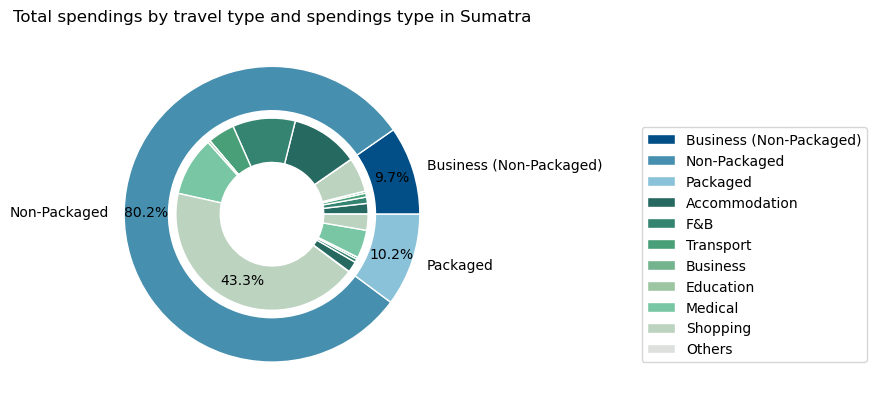

In [223]:
fig, ax = plt.subplots()
size = 0.3
region = df1[df1['Regions'] == "Sumatra"]
def myautopct(pct):
    return ('%.1f%%' % pct) if pct > 20 else ''
#outer 
outer = region.groupby('travel_type')['total_spendings'].sum()
outer_label = outer.index
ax.pie(outer.values.flatten(), radius=1,autopct='%1.1f%%', pctdistance = 0.85, colors=['#014f86','#468faf','#89c2d9'],
       wedgeprops=dict(width=size, edgecolor='w'), labels = outer_label)

#inner
spendings = []
for t in outer.index:
    temp = region[region['travel_type'] == t]
    spendings.append(temp['totacc_$'].sum())
    spendings.append(temp['totfnb_$'].sum())
    spendings.append(temp['tottran_$'].sum())
    spendings.append(temp['totbiz_$'].sum())
    spendings.append(temp['totedu_$'].sum())
    spendings.append(temp['totmedi_$'].sum())
    spendings.append(temp['totshopping_$'].sum())
    spendings.append(temp['tototh_$'].sum())
inner = np.array(spendings)   
inner_label = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']
ax.pie(inner.flatten(), radius=0.95-size, autopct = myautopct, pctdistance = 0.75, 
       colors=['#266961', '#358471', '#49A078', '#73B38D', '#9CC5A1', '#78c6a3', '#BCD3C0', '#DCE1DE'] * 3,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Total spendings by travel type and spendings type in Sumatra')
label = outer_label.values
for x in inner_label:
    label = np.append(label, x)
ax.legend(label, loc=[1.5,0.1])
plt.show()

This plot also shows a nested pie chart similar to the previous one shown for Java. However, it is even more obvious here that Non-Packaged travel type leads in the percentage against the total spendings in Sumatra with 80.2%. However for Sumatra, shopping expenditures have the highest contribution with 43.3%, coming close to almost half of the entire expenditures. And the percentage for packaged travel type is higher, with 10.2%, than that of in Java. This means Sumatra may have more potential in getting more customers for the tour agency. Packaged travel has a larger percentage of medical expenditures against the total in Packaged. The packages with medical screenings or check ups will be more suited for tourists in Java. As for Sumatra, it is suggested to include more shopping activities in the package since tourists from Sumatra spend more on shopping in Singapore. Adding more shopping activities to the itenary will get the attention of the target audience, hence increase the sales for the tour agency's product line.

### 4. Breakdown of total spendings within selected cities based on previous discoveries.

#### Java (Jakarta, Suarabaya, Bandung) - Packaged

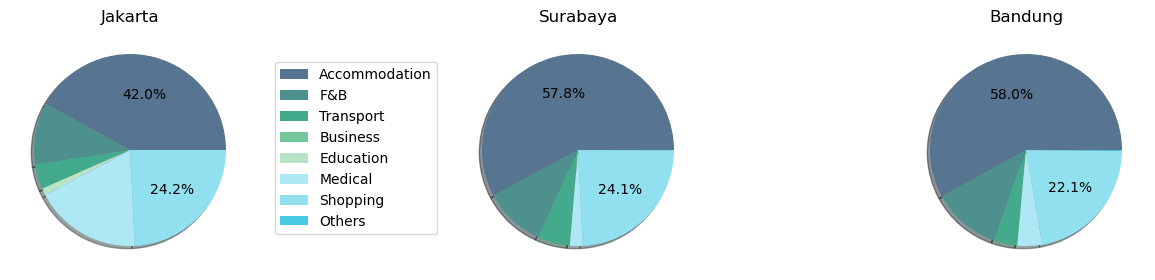

In [244]:
fig = plt.figure()

colors = ['#577590', '#4d908e', '#43aa8b', '#74C69D', '#B7E4C7', '#ade8f4', '#90e0ef', '#48cae4']
travel = df1[df1['travel_type'] == 'Packaged']

label = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']
city = travel[travel['City_residence'] == 'Jakarta']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)
ax1 = fig.add_axes([-0.7, 0, .5, .5], aspect=1)
ax1.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax1.set_title("Jakarta")

city = travel[travel['City_residence'] == 'Surabaya']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax2.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax2.set_title("Surabaya")

city =travel[travel['City_residence'] == 'Bandung']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)
ax3 = fig.add_axes([0.7, 0, .5, .5], aspect=1)
ax3.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax3.set_title("Bandung")
plt.legend(label, loc=[-2.63,0.15])
plt.show()

These charts shows the breakdown of total spendings in these cities for tourists with packaged travel type. This is to see what the tour agency can modify or add into packages to promote and advertise in these cities. For all 3 cities, Accommodation makes up the most of the total expenditures. Based on previous discoveries on Java cities, the tour agency should try to reduce costs on Accommodation by including in 3 or 4 star hotels instead of 5 stars hotel in their packages as they can get very expensive in Singapore. Reducing cost of accommodation will attract most tourists since they will have more budget allocated to check out other activities likes shopping, which generally made up around 22% to 24% of the total expenditures.

#### Sumatra (Batam, Medan, Tanjung Pinang) - Non Packaged

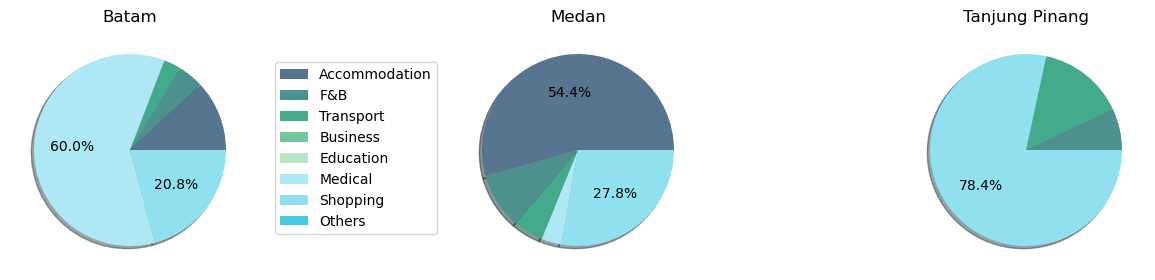

In [245]:
fig = plt.figure()
colors = ['#577590', '#4d908e', '#43aa8b', '#74C69D', '#B7E4C7', '#ade8f4', '#90e0ef', '#48cae4']
travel = df1[df1['travel_type'] == 'Packaged']
label = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']

city = travel[travel['City_residence'] == 'Batam']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)
ax1 = fig.add_axes([-0.7, 0, .5, .5], aspect=1)
ax1.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax1.set_title("Batam")

city = travel[travel['City_residence'] == 'Medan']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax2.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax2.set_title("Medan")

city =travel[travel['City_residence'] == 'Tanjung Pinang']
spendings = []
acc = city['totacc_$'].sum()
spendings.append(acc)
fnb = city['totfnb_$'].sum()
spendings.append(fnb)
tran = city['tottran_$'].sum()
spendings.append(tran)
biz = city['totbiz_$'].sum()
spendings.append(biz)
edu = city['totedu_$'].sum()
spendings.append(edu)
medi = city['totmedi_$'].sum()
spendings.append(medi)
shop = city['totshopping_$'].sum()
spendings.append(shop)
others = city['tototh_$'].sum()
spendings.append(others)

ax3 = fig.add_axes([0.7, 0, .5, .5], aspect=1)
ax3.pie(spendings, autopct=myautopct, shadow=True, colors = colors)
ax3.set_title("Tanjung Pinang")

plt.legend(label, loc=[-2.63,0.15])
plt.show()

These charts shows the breakdown of total spendings in these cities for tourists with packaged travel type. This is to see what the tour agency can modify or add into packages to promote and advertise in these cities. Firstly for Batam, Medical expenditures makes up most of the total expenditures with 60%. It will be better if the package increase its shopping activities since tourists with non-packaged travel spent more on shopping. Secondly, for Medan, Accommodation makes up 54.4% of the total expenditures in Sumatra. Similar to the cities in Java, the tour agency should reduce the cost of accommodations in the packages for the tourists to spend more on activities like shopping or health check ups in Singapore. Lastly, for Tanjung Pinang, Shopping makes up 78.4% of all the expenditures. Packages promoted in Tanjung Pinang would be a good standard for the other cities in Sumatra as well.

### Question 5: What is the optimal length of stay to be included in the packages?

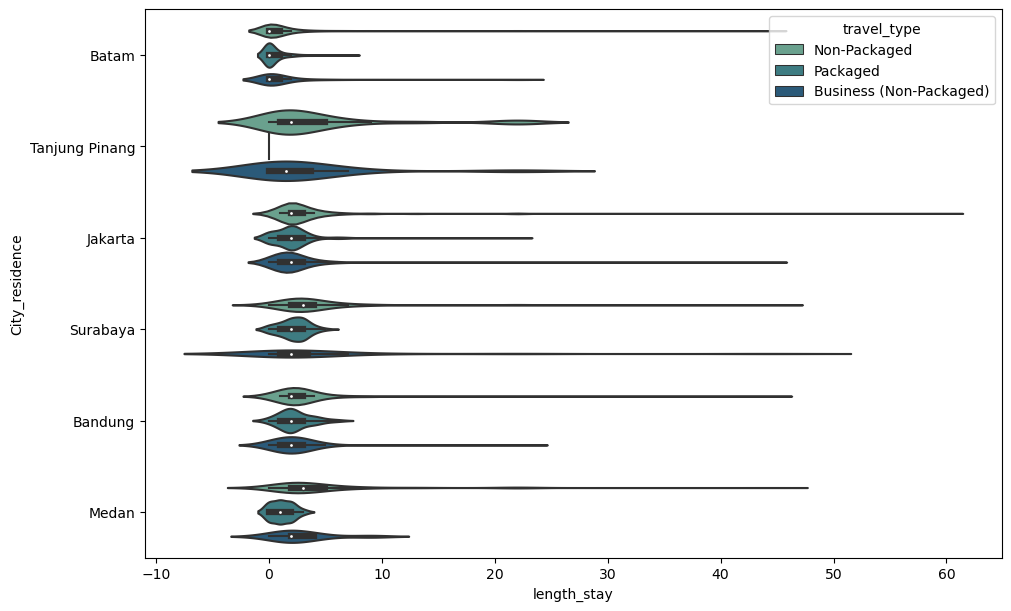

In [246]:
x = df1['City_residence']
data = df1.filter(regex = '^tot', axis = 1)
data = data.join(x)
city = ['Jakarta', 'Surabaya', 'Bandung', 'Batam', 'Medan', 'Tanjung Pinang']
for i in data['City_residence']:
    if i not in city:
        data = data.drop(data[data['City_residence'] == i].index)

fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
sns.violinplot(x=df1["length_stay"], y=data["City_residence"], hue=df1["travel_type"], palette="crest")
plt.show()

This chart shows the distribution of length of stay by travel types in the 6 selected cities. In general, the average length of stay for tourists with Non-Packaged travel types is slightly longer than the packaged travel types. The only exception is from Jakarta, where the average length of stay for Non-Packaged tourists is shorter than tourists with Packaged travel type. Hence, for most of the cities except Jakarta, the packages for these cities should increase the duration of the itenary, extending the stay in Singapore by 1 or 2 days. But for Jakarta, packages should reduce the duration stayed in Singapore to suit what the tourists from Jakarta like.

### 6. Who is the target audience of the tour agency's packages

#### By number of tourists in one entry : self + travel companions

#### Java

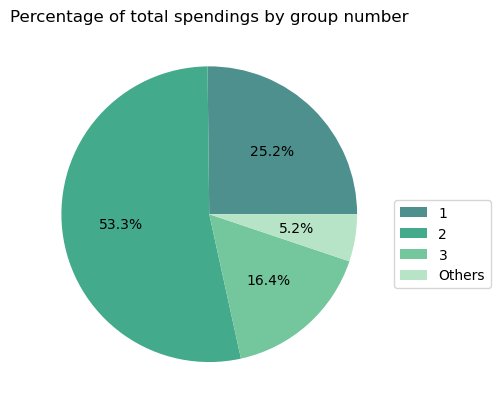

In [250]:
region = df1[df1['Regions'] == 'Java']
spend = region.groupby('grp_num')['total_spendings'].sum()
spendings = []
total = 0
subtotal = 0
for s in spend:
    total += s
for s in spend:
    if s/total > 0.1:
        spendings.append(s)
    else:
        subtotal += s
spendings.append(subtotal)

group = np.unique(region['grp_num'].values)
if len(group) > len(spendings):
    difference = len(group) - len(spendings)
    group = group[::-1]
    group[:difference+1] = 'Others'
    group = group[::-1]
plt.pie(spendings, autopct='%1.1f%%', colors = ['#4d908e', '#43aa8b', '#74C69D', '#B7E4C7'])
plt.title('Percentage of total spendings by group number')
plt.legend(group, loc = [1, .3])
plt.show()

This pie chart aims to show how the number of people recorded in one entry affects the total spendings. From this chart, those travelling with one other person generally spend more as it has a higher total spendings amount, with 53.3% of the total spendings in Java. This means that packages in Java should target tourists who will be travelling with one other person.

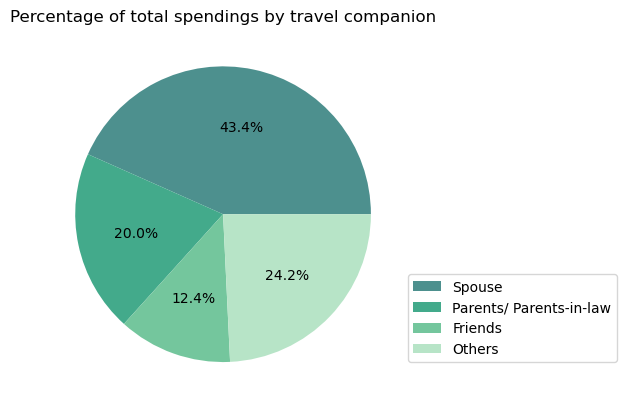

In [251]:
two = region[region['grp_num'] == 2]
spend = two.groupby('travel_companion.1')['total_spendings'].sum()
spend.sort_values(ascending = False, inplace = True)
label = spend.index.values
spendings = []
total = 0
subtotal = 0
for s in spend:
    total += s
for s in spend:
    if s/total > 0.1:
        spendings.append(s)
    else:
        subtotal += s
spendings.append(subtotal)
if len(label) > len(spendings):
    difference = len(label) - len(spendings)
    label = label[::-1]
    label[:difference+1] = 'Others'
    label = label[::-1]

plt.pie(spendings, autopct='%1.1f%%', colors = ['#4d908e', '#43aa8b', '#74C69D', '#B7E4C7'])
plt.legend(label, loc = [1, 0.1])
plt.title('Percentage of total spendings by travel companion')
plt.show()

This pie chart is a zoom in to the previous pie chart. It zooms into tourists travelling with one other companion, showing the percentage of total spendings for the different companions recorded in the survey. From this pie chart, a tourist's spouse makes 43.4% of the total expenditures in Java, this means that packages should target more couples who are interested in visiting Singapore.

#### Sumatra

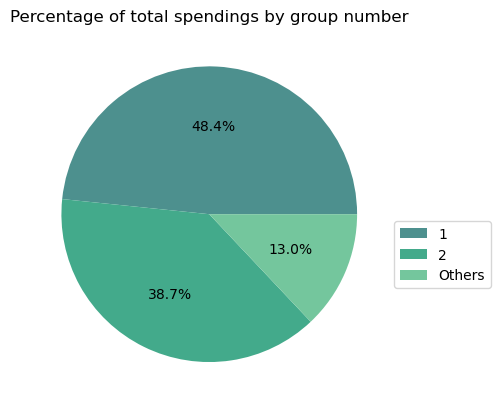

In [252]:
region = df1[df1['Regions'] == 'Sumatra']
spend = region.groupby('grp_num')['total_spendings'].sum()
spendings = []
total = 0
subtotal = 0
for s in spend:
    total += s
for s in spend:
    if s/total > 0.1:
        spendings.append(s)
    else:
        subtotal += s
spendings.append(subtotal)

group = np.unique(region['grp_num'].values)
if len(group) > len(spendings):
    difference = len(group) - len(spendings)
    group = group[::-1]
    group[:difference+1] = 'Others'
    group = group[::-1]
plt.pie(spendings, autopct='%1.1f%%', colors = ['#4d908e', '#43aa8b', '#74C69D', '#B7E4C7'])
plt.title('Percentage of total spendings by group number')
plt.legend(group, loc = [1, .3])
plt.show()

From this pie chart, its shown that tourists from Sumatra who are travelling alone have a higher total spendings as compared to having company. Individual travellers make up 48.4% of the total spendings by tourists from Sumatra. This means that packages promoting in Sumatra should target individual travellers.

#### By working or non-working tourists.

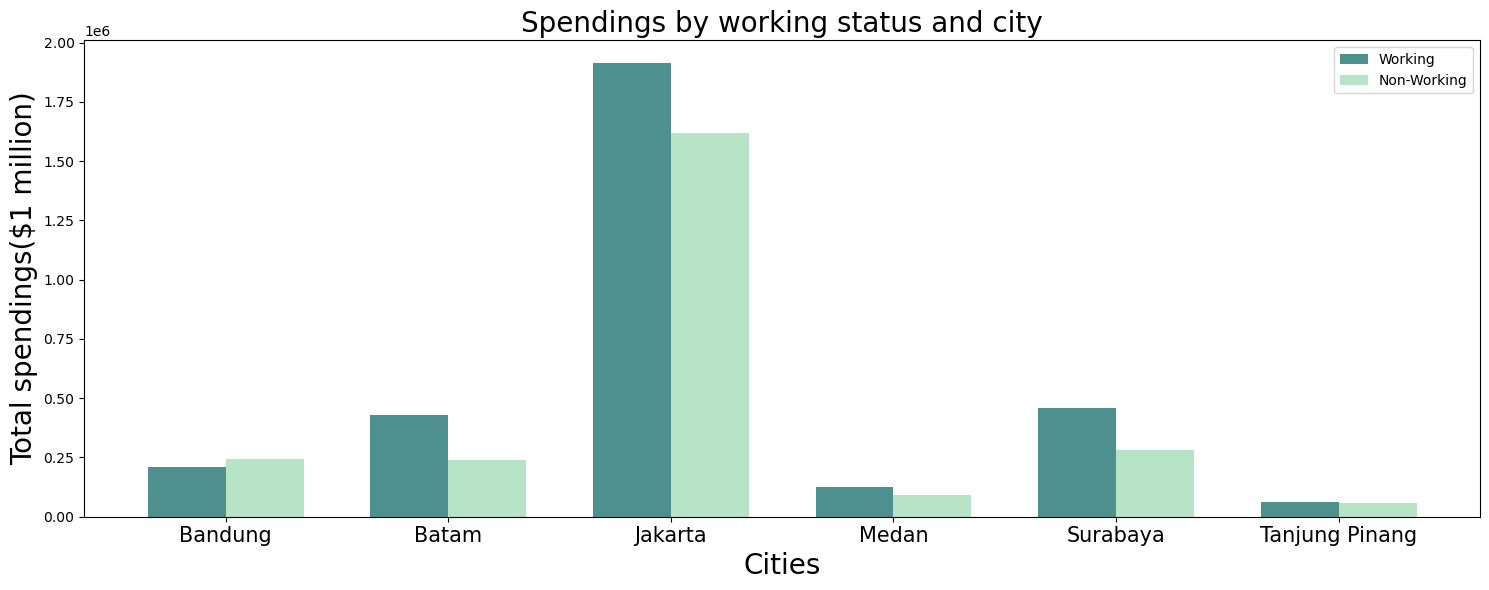

In [37]:
y = df1['Working_status']
data1 = data
data1 = data.join(y)
width = 0.35
city = np.unique(data1['City_residence'].values)
x = np.arange(len(city))
work = data1[data1['Working_status'] == 'Working']
yes = work.groupby('City_residence')['total_spendings'].sum()
work = data1[data1['Working_status'] == 'Non-Working']
no = work.groupby('City_residence')['total_spendings'].sum()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))

bar1 = axes.bar(x-width/2, yes, width, color = '#4d908e', label='Working')
bar2 = axes.bar(x+width/2, no, width, color = '#B7E4C7', label='Non-Working')

axes.set_title('Spendings by working status and city', fontsize = 20)
axes.set_xlabel('Cities', fontsize = 20)
axes.set_ylabel('Total spendings($1 million)', fontsize = 20)
axes.set_xticks(x)
axes.set_xticklabels(city, fontsize = 15)
axes.legend()
fig.tight_layout()
plt.show()

This chart compares the total spendings of Working and Non-Working tourists by city. In general, working tourists have a higher total spending comapred to non-working tourists. For these cities, packages should target worker instead of non-workers. This can be done by advertising and promoting through workplaces and companys. There can also be packages created for company travels to attract more customers to the tour agency. However, the anomaly here is Bandung, where the total spendings from non-working tourists is more than that of working tourists. Hence, for Bandung, the tour agency should have packages that target non-workers. One suggestion is to promote more through social media since in general, non-workers will spend more time on social media to past time.

### 7. Is there a period or month to push more advertisements and promotions to attract more tourists?

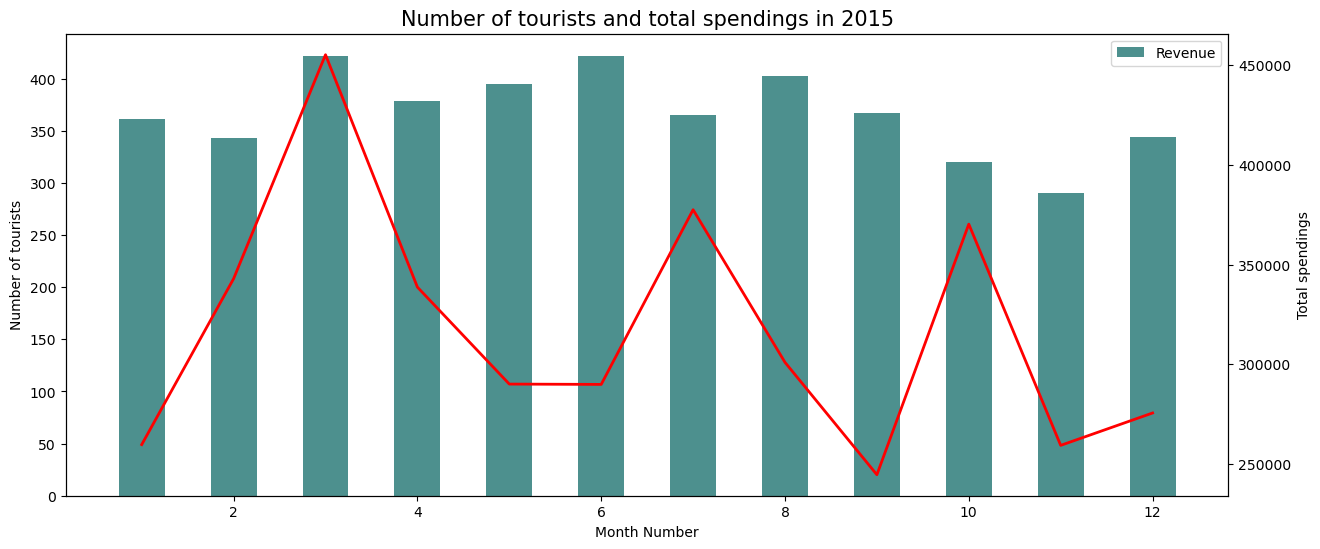

In [38]:
five = df1[df1['Year'] == 2014]
spend = five.groupby('month_number')['total_spendings'].sum()
month = np.unique(five['month_number'].values)
tourist = five.groupby('month_number')['case'].count()

fig, ax3 = plt.subplots(1,1,figsize=(15,6))

ax3.bar(month, tourist, width=0.5, label='Revenue', color = '#4d908e')
ax3.set_title('Number of tourists and total spendings in 2015', fontsize = 15)
ax3.set_ylabel('Number of tourists', fontsize = 10) 
ax3.set_xlabel('Month Number')
ax4 = ax3.twinx()
ax4.plot(month, spend, linewidth = 2, c = 'r')
ax4.set_ylabel('Total spendings', fontsize = 10) 
ax3.legend()
plt.show()

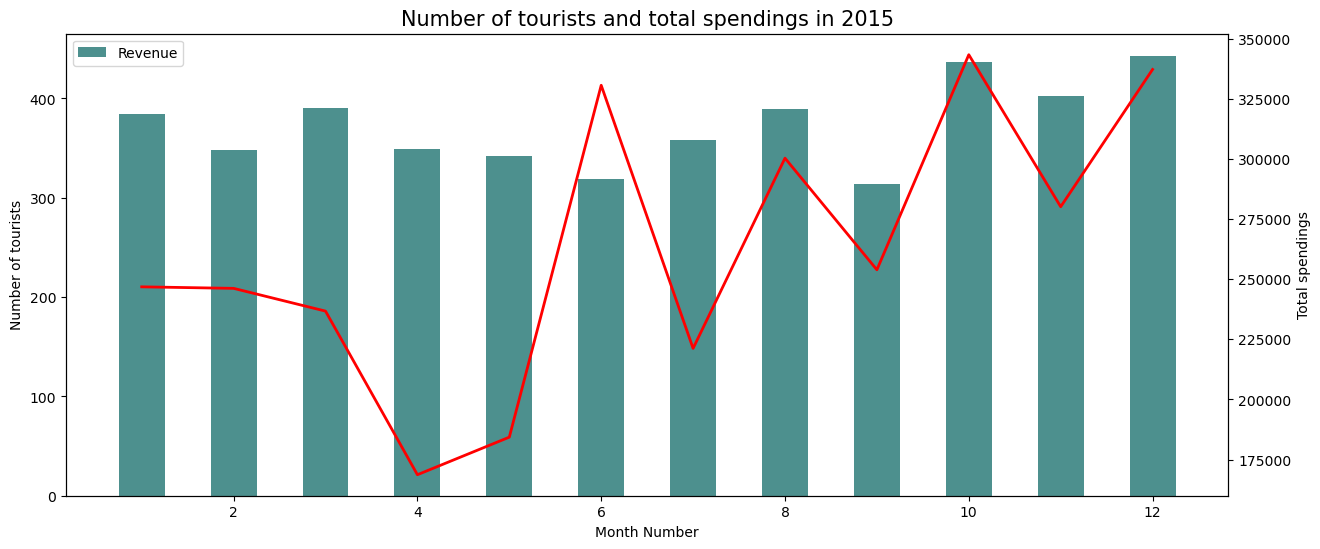

In [39]:
five = df1[df1['Year'] == 2015]
spend = five.groupby('month_number')['total_spendings'].sum()
month = np.unique(five['month_number'].values)
tourist = five.groupby('month_number')['case'].count()

fig, ax3 = plt.subplots(1,1,figsize=(15,6))

ax3.bar(month, tourist, width=0.5, label='Revenue', color = '#4d908e')
ax3.set_title('Number of tourists and total spendings in 2015', fontsize = 15)
ax3.set_ylabel('Number of tourists', fontsize = 10) 
ax3.set_xlabel('Month Number')
ax4 = ax3.twinx()
ax4.plot(month, spend, linewidth = 2, c = 'r')
ax4.set_ylabel('Total spendings', fontsize = 10) 
ax3.legend()
plt.show()

When comparing these 2 bar graphs, a suitable month to push out advertisements and promotions is the period before March and August. March and August has almost the same number of tourists visiting Sigapore for both 2014 and 2015, hence these 2 periods will most probably be when tourists will visit Singapore. Hence, to let tourists plan and prepare in advance, it is good to advertise and promote ahead of these peak "seasons".

## Dashboard

### 1. Overview

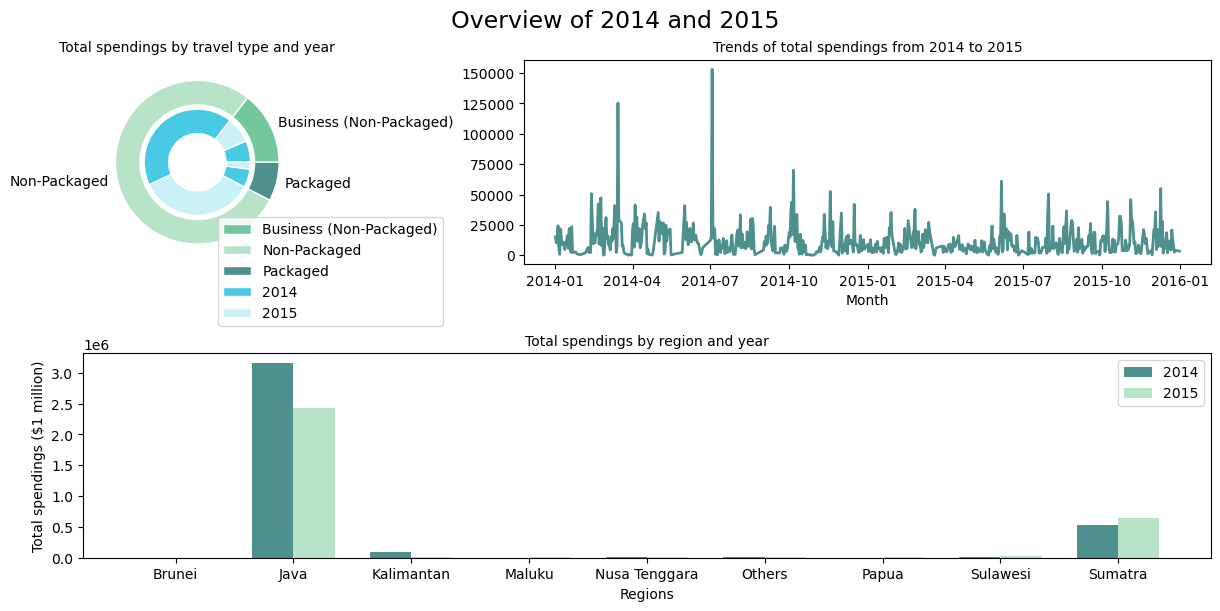

In [130]:
fig = plt.figure(figsize=(12,6), constrained_layout=True)
size = 0.3
gs = GridSpec(nrows=2, ncols=6, figure=fig)
#outer 
ax1 = fig.add_subplot(gs[0, :2])
outer = df1.groupby('travel_type')['total_spendings'].sum()
outer_label = outer.index
ax1.pie(outer.values.flatten(), radius=1,colors=['#74C69D','#B7E4C7','#4d908e'],
       wedgeprops=dict(width=size, edgecolor='w'), labels = outer_label)

#inner
inner = df1.groupby(['travel_type', 'Year'])['total_spendings'].sum() 
inner_label = ['2014','2015']
ax1.pie(inner.values.flatten(), radius=0.95-size,
       colors=['#48cae4', '#caf0f8'] * 3,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal")
ax1.set_title('Total spendings by travel type and year', fontsize = 10)
label = outer_label.values
for x in inner_label:
    label = np.append(label, x)
ax1.legend(label, loc=[0.6,-.3])


ax2 = fig.add_subplot(gs[1:, :])
region = np.unique(df1['Regions'].values)
x = np.arange(len(region))
width = 0.35
spend = []
four = df1[df1['Year'] == 2014]
for r in region:
    if r in four['Regions'].values:
        temp = four[four['Regions'] == r]
        spend.append(temp['total_spendings'].sum())
    else:
        spend.append(0)
spend1 = []
four = df1[df1['Year'] == 2015]
for r in region:
    if r in four['Regions'].values:
        temp = four[four['Regions'] == r]
        spend1.append(temp['total_spendings'].sum())
    else:
        spend1.append(0)
ax2.bar(x-width/2, spend, width, color = '#4d908e', label = '2014')
ax2.bar(x+width/2, spend1, width, color = '#B7E4C7', label = '2015')
ax2.set_title('Total spendings by region and year', fontsize = 10)
ax2.set_ylabel('Total spendings ($1 million)', fontsize = 10)
ax2.set_xticks(x)
ax2.set_xticklabels(region)
ax2.set_xlabel('Regions')
ax2.legend()


ax3 = fig.add_subplot(gs[0, 2:])
temp = df1.sort_values('date')
date = np.unique(temp['date'].values)
spend = temp.groupby('date')['total_spendings'].sum()
ax3.plot(date, spend, linewidth = 2, c = '#4d908e')
ax3.set_xlabel('Month')
ax3.set_title('Trends of total spendings from 2014 to 2015', fontsize = 10)
fig.suptitle('Overview of 2014 and 2015', fontsize = 17)
plt.show()

This dashboard consolidates the overview of total spendings recorded in 2014 and 2015.

Firstly, the nested pie chart breaks down the total spendings by the travel type of Tourists, namely, Packaged travel, Non-Packaged travel, and Business Non-Packaged travel. Each catgeory is then broken down further into years 2014 and 2015. From this chart we can see that Non-Packaged travel makes up most of the total spendings. Hence, when the tour agency is considering what to modify and improve their products on, they should look at Non-Packaged travels to compare the data and account for their preferences in the current or new packages. At the same time, looking at the 2 years, it seems that total spendings in 2015 has dropped from 2014 for travel types Packaged and Non-Packaged. This may be caused by lesser tourists visiting Singapore. To counter this problem, the tour agency should try to advertise as much as they could to bring people to notice the packages and visit Singapore. Another possibility is that tourists who visited Singapore multiple times feel bored to visit Singapore again. For this, the tour agency should come up with new packages every year, with similar yet different activities to keep attracting tourists to visit Singapore.

Next, the line chart on the top right shows the total spendings from the start of 2014 to the end of 2015. Even though the data is fluctuating and there is no obvious trend, it can be seen vaguely that the total spendings increases from July to October before decreasing in November to January for both 2014 and 2015. With this information, the tour agency can increase their advertisements and promotions during this period where there will be more tourists coming to Singapore. 

Lastly, the side-by-side bar chart at the bottom shows the comparison of total spendings between 2014 and 2015 across the different regions of Indonesia that tourists are living in. We can see that most of the total spendings come from Java for both years, and Sumatra coming in second. However, it seems that as time pasts, total spendings from Java decreases, while total spendings from Sumatra increases. The tour agency may want to take note of this as this will affect how much the company should invest in advertisements at these regions. Knowing that total spendings are increasing over time in Sumatra, the tour agency should consider investing more money and time into promoting its products in Sumatra.

### 2. Jakarta

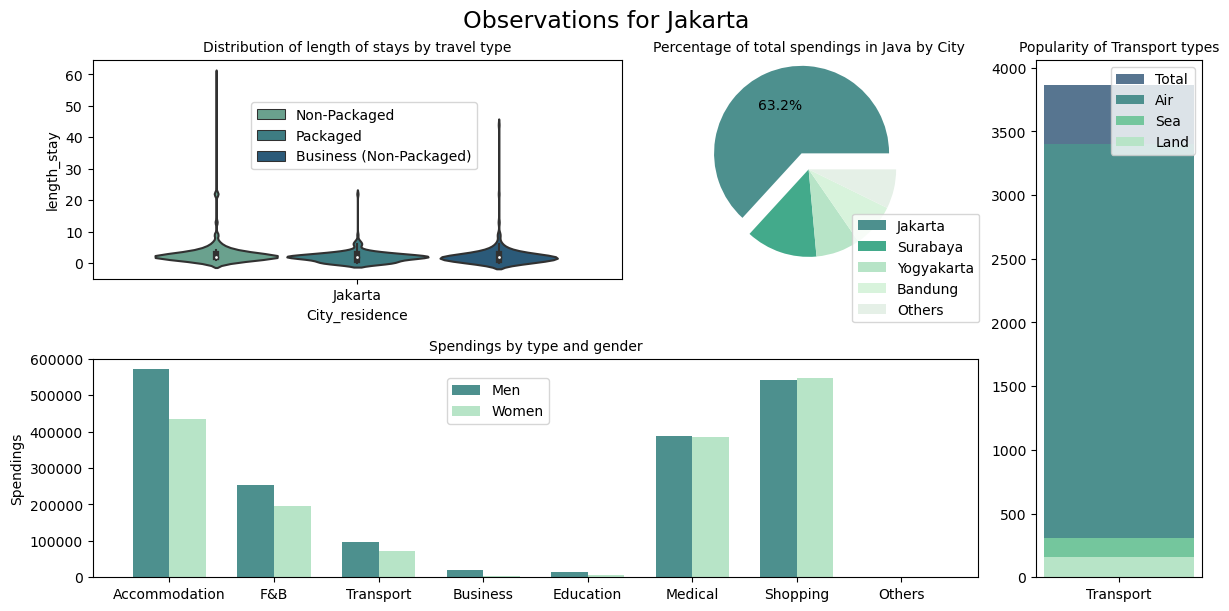

In [253]:
fig = plt.figure(figsize=(12,6), constrained_layout=True)
size = 0.3
gs = GridSpec(nrows=2, ncols=6, figure=fig)

ax1 = fig.add_subplot(gs[0, 3:5])
region = df1[df1['Regions'] == 'Java']
spend = region.groupby('City_residence')['total_spendings'].sum()
spend.sort_values(ascending=  False, inplace = True)
spendings = []
total = 0
subtotal = 0
for s in spend:
    total += s
for s in spend:
    if s/total > 0.05:
        spendings.append(s)
    else:
        subtotal += s
spendings.append(subtotal)

group = spend.index.values
if len(group) > len(spendings):
    difference = len(group) - len(spendings)
    group = group[::-1]
    group[:difference+1] = 'Others'
    group = group[::-1]
ax1.pie(spendings, autopct=myautopct, explode = [0.2, 0,0,0,0], colors = ['#4d908e', '#43aa8b', '#B7E4C7', '#D8F3DC','#E5F0E7'])
ax1.legend(group, loc = [.7, -.2])
ax1.set_title("Percentage of total spendings in Java by City", fontsize = 10)



ax2 = fig.add_subplot(gs[1,:5])
temp = df1[df1['City_residence'] == 'Jakarta']

x_labels = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']
men_tot = []
men = temp[temp['f1_gender']=='Male']
men_tot.append(men['totacc_$'].sum())
men_tot.append(men['totfnb_$'].sum())
men_tot.append(men['tottran_$'].sum())
men_tot.append(men['totbiz_$'].sum())
men_tot.append(men['totedu_$'].sum())
men_tot.append(men['totmedi_$'].sum())
men_tot.append(men['totshopping_$'].sum())
men_tot.append(men['tototh_$'].sum())

women_tot = []
women = temp[temp['f1_gender']=='Female']
women_tot.append(women['totacc_$'].sum())
women_tot.append(women['totfnb_$'].sum())
women_tot.append(women['tottran_$'].sum())
women_tot.append(women['totbiz_$'].sum())
women_tot.append(women['totedu_$'].sum())
women_tot.append(women['totmedi_$'].sum())
women_tot.append(women['totshopping_$'].sum())
women_tot.append(women['tototh_$'].sum())

x = np.arange(len(x_labels))  
width = 0.35

ax2.bar(x - width/2, men_tot, width, label='Men', color = '#4d908e')
ax2.bar(x + width/2, women_tot, width, label='Women', color = '#B7E4C7')

ax2.set_title('Spendings by type and gender', fontsize = 10)
ax2.set_ylabel('Spendings', fontsize = 10)
ax2.legend(loc = [.4,.7])
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)

ax3 = fig.add_subplot(gs[0, :3])
temp = df1[df1['City_residence'] == 'Jakarta']
sns.violinplot(x=temp["City_residence"],y=temp["length_stay"], hue=temp["travel_type"], palette="crest")
fig.suptitle('', fontsize = 17)
plt.legend(loc = [.3,.5])
ax3.set_title('Distribution of length of stays by travel type', fontsize = 10)

ax4 = fig.add_subplot(gs[:, 5:])
count = temp.groupby('Transport')['case'].count()
count.sort_values(ascending = False, inplace = True)
trans = count.index.values
labels = []
labels = ['Total']
for t in trans:
    labels.append(t)
total = 0
for c in count:
    total += c
x = 'Transport'
ax4.bar(x, total, color = '#577590')
ax4.bar(x, count[0] , color = '#4d908e')
ax4.bar(x,count[1], color = '#74C69D')
ax4.bar(x, count[2], color = '#B7E4C7')
ax4.legend(labels)
ax4.set_title('Popularity of Transport types', fontsize = 10)
fig.suptitle('Observations for Jakarta', fontsize = 17)
plt.show()

This dashboard showcases the breakdown of spendings in Jakarta, Java.

Firstly, the pie chart shows the percentage of total spendings from each region in Java, and Jakarta makes up more than half of the total with 63.2%.

The violin plot on the left shows the distribution of the length of stay of tourists by the 3 travel types mentioned earlier. We can see that there is a higher concentration of tourists staying in Singapore for around 2-3 days. However, comparing packaged and non-packaged travel type, non-packaged travel type has a lower average length of stay. If we were to recalll our findings from the 1st dashboard, it will be better to have the product lines to fit the mean average length of stay of the non-packaged travel type since.

Next, on the far right, it shows the number of tourists who take each mode of Transport to visit Singapore. It is evident that Air travels is the most popular way of transport for tourists in Jakarta. Hence packages promoted in Jakarta should generally include 2 way flights to Singapore and back.

Lastly, this side-by-side chart breaks down the total spendings into spending type and gender. We can see that tourists from Jakarta spend most on shopping, followed by accommodation and medical. However, the order changes when we look at the 2 different genders. For Women, it is suggested to include more shopping activities in the packages since it has the highest amount here, and for Men, the packages should include good and well-rounded hotels. Including these items into a package will attract more attention from the targetted audience as it is something the tourists are more willing to spend on. 

### 3. Batam

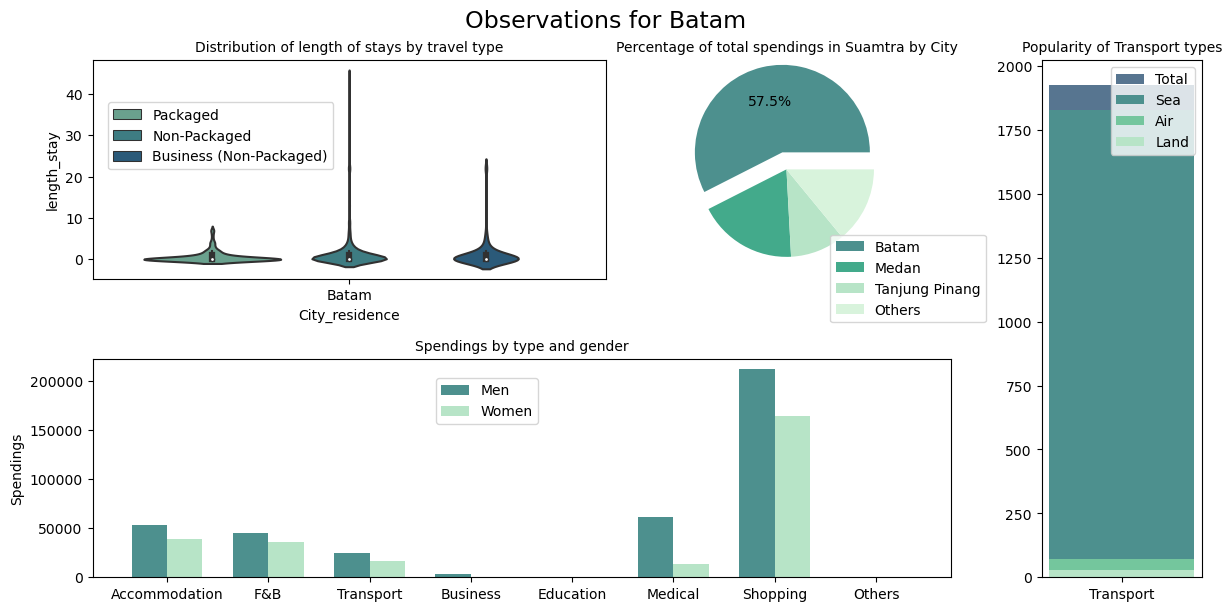

In [264]:
fig = plt.figure(figsize=(12,6), constrained_layout=True)
size = 0.3
gs = GridSpec(nrows=2, ncols=6, figure=fig)

ax1 = fig.add_subplot(gs[0, 3:5])
region = df1[df1['Regions'] == 'Sumatra']
spend = region.groupby('City_residence')['total_spendings'].sum()
spend.sort_values(ascending=  False, inplace = True)
spendings = []
total = 0
subtotal = 0
for s in spend:
    total += s
for s in spend:
    if s/total > 0.05:
        spendings.append(s)
    else:
        subtotal += s
spendings.append(subtotal)

group = spend.index.values
if len(group) > len(spendings):
    difference = len(group) - len(spendings)
    group = group[::-1]
    group[:difference+1] = 'Others'
    group = group[::-1]
ax1.pie(spendings, autopct=myautopct, explode = [0.2, 0,0,0], colors = ['#4d908e', '#43aa8b', '#B7E4C7', '#D8F3DC','#E5F0E7'])
ax1.legend(group, loc = [.7, -.2])
ax1.set_title("Percentage of total spendings in Suamtra by City", fontsize = 10)



ax2 = fig.add_subplot(gs[1,:5])
temp = df1[df1['City_residence'] == 'Batam']

x_labels = ['Accommodation', "F&B", 'Transport', 'Business', 'Education', 'Medical', 'Shopping', 'Others']
men_tot = []
men = temp[temp['f1_gender']=='Male']
men_tot.append(men['totacc_$'].sum())
men_tot.append(men['totfnb_$'].sum())
men_tot.append(men['tottran_$'].sum())
men_tot.append(men['totbiz_$'].sum())
men_tot.append(men['totedu_$'].sum())
men_tot.append(men['totmedi_$'].sum())
men_tot.append(men['totshopping_$'].sum())
men_tot.append(men['tototh_$'].sum())

women_tot = []
women = temp[temp['f1_gender']=='Female']
women_tot.append(women['totacc_$'].sum())
women_tot.append(women['totfnb_$'].sum())
women_tot.append(women['tottran_$'].sum())
women_tot.append(women['totbiz_$'].sum())
women_tot.append(women['totedu_$'].sum())
women_tot.append(women['totmedi_$'].sum())
women_tot.append(women['totshopping_$'].sum())
women_tot.append(women['tototh_$'].sum())
x = np.arange(len(x_labels))  
width = 0.35

ax2.bar(x - width/2, men_tot, width, label='Men', color = '#4d908e')
ax2.bar(x + width/2, women_tot, width, label='Women', color = '#B7E4C7')
ax2.set_title('Spendings by type and gender', fontsize = 10)
ax2.set_ylabel('Spendings', fontsize = 10)
ax2.legend(loc = [.4,.7])
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)

ax3 = fig.add_subplot(gs[0, :3])
temp = df1[df1['City_residence'] == 'Batam']
sns.violinplot(x=temp["City_residence"],y=temp["length_stay"], hue=temp["travel_type"], palette="crest")
fig.suptitle('', fontsize = 17)
plt.legend(loc = [0.03,.5])
ax3.set_title('Distribution of length of stays by travel type', fontsize = 10)

ax4 = fig.add_subplot(gs[:, 5:])
count = temp.groupby('Transport')['case'].count()
count.sort_values(ascending = False, inplace = True)
trans = count.index.values
labels = []
labels = ['Total']
for t in trans:
    labels.append(t)
total = 0
for c in count:
    total += c
x = 'Transport'
ax4.bar(x, total, color = '#577590')
ax4.bar(x, count[0] , color = '#4d908e')
ax4.bar(x,count[1], color = '#74C69D')
ax4.bar(x, count[2], color = '#B7E4C7')
ax4.set_title('Popularity of Transport types', fontsize = 10)
ax4.legend(labels)
fig.suptitle('Observations for Batam', fontsize = 17)
plt.show()

This dashboard will showcase the breakdown of spendings in Batam. Batam also makes up more than half of the total spendings in Sumatra, but with a lower percentage of 57.5% as compared to Jakarta in Java previously.

Generally for Batam, packages should extend the itenary duration since non-packaged travel types stay longer in Singapore on average than packaged travels. The package should also come with Sea transportation since most tourists from Batam perfer to travel by Sea to reach Singapore.

Lastly, it is very obvious that packages should include shopping activities for both genders, and maybe medical checkups and screenings for males.

## Conclusion

In summary, there are a few key takeaways from these analyses. Firstly, it is recommended for the tour agency to have varying types of packages that will cater to the preferences and characteristics or habits of the tourists. Secondly, when looking out for these preferences or habits from tourists, it is good to look at different perspectives like regions and cities. To sum up for Java, packages should reduce the accommodation prices by replacing 5 star hotels with 3 or 4 stars that will not cost as much. Packages should also include more shopping activities and medical activities that will entice the general target audience. It should also have a two way flight to Singapore and back to Jakarta. The itenary should be kept short with a duration of 2 day. On the other hand for Sumatra, packages can include more shopping acitivites, but modification on current packages should be adding a little bit of medical activities. Instead of flights, packages for Sumatra should promote sea travels and lastly, the itenary should be 1 day longer.

### Reflection

#### How does the work on assignment 2 compare to assignment 1?

I find myself studying the dataset given more meticulously for ASG 2 compared to ASG 1 though the datasets given in ASG 1 is larger. The time spent working on assignment 2 is also much more than assignment 1 since there are a lot more things to do like coding and cleaning.

#### What would I do differently next time, if given the chance?

What I would have done differently would be to explore more libraries available in Python for plotting. In this report I've only used MatplotLib, Seaborn. If given more chances and time, I would like to explore more libraries.